
# ANALYSIS OF EFFECTS OF TREATMENT ON SOIL ACROSS COUNTIES
--- Soil is a fundamental component of the ecosystem, supporting plant growth, regulating water, and serving as a key medium in various agricultural and environmental processes. However, soil quality can be significantly impacted by different treatments, including chemical, organic, or mechanical interventions. Understanding the effects of these treatments is essential for ensuring sustainable agricultural practices, maintaining soil fertility, and mitigating environmental degradation.

This analysis aims to evaluate how various treatments affect soil properties, such as pH, nutrient content, and microbial activity. By examining and comparing treated versus untreated soil samples, the study seeks to draw insights into the most effective and sustainable methods for improving soil health and productivity. The findings from this analysis will contribute to the broader understanding of soil management strategies and their potential to enhance agricultural output while preserving ecological balance.


## Installing packages needed for the analysis

In [7]:
install.packages("tidyverse")
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(readr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Importing the dataset

In [8]:
soil_data <- read_csv("20250322Soils.csv")

Rows: 90 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): County, Farm_ID, Treatment, Depth
dbl (13): Season, Serial_number, pH, EC, SOC, %SOC, (P)ACT. C, K. CONC.meq, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Exploring the Data-set

In [9]:
head(soil_data, 5)

County,Season,Farm_ID,Treatment,Depth,Serial_number,pH,EC,SOC,%SOC,(P)ACT. C,K. CONC.meq,%N,Ca.meq/100g,Mg.meq/100g,Fe.meq/100g,Zn.ppm
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Vihiga,2,Nicholas,Pushpull,Top,81,5.12,110.9,18.676596,0.18676596,24.13630,0.2593590,0.10928155,1.571367,0.5399669,106.2371,97.7579
Vihiga,2,Nicholas,Pushpull,Sub,82,5.02,62.3,6.791489,0.06791489,23.18978,0.2881766,0.09562136,1.469832,0.3217339,15.2285,124.6894
Vihiga,2,Nicholas,Pushpull+pigeonpea,Top,83,4.83,83.6,7.810213,0.07810213,34.54804,0.0529304,0.09562136,1.058859,0.3889532,7.0704,94.2829
Vihiga,2,Nicholas,Pushpull+pigeonpea,Sub,84,5.06,35.8,9.172414,0.09172414,25.08282,0.1852564,0.01366019,1.174899,0.3760621,22.6615,309.7349
Vihiga,2,Nicholas,Monocrop,Top,85,5.25,34.6,22.625287,0.22625287,35.25793,0.1365047,0.01366019,1.455327,0.5556210,10.1523,131.6395


In [10]:
colnames(soil_data)

[1] "County"        "Season"        "Farm_ID"       "Treatment"    
 [5] "Depth"         "Serial_number" "pH"            "EC"           
 [9] "SOC"           "%SOC"          "(P)ACT. C"     "K. CONC.meq"  
[13] "%N"            "Ca.meq/100g"   "Mg.meq/100g"   "Fe.meq/100g"  
[17] "Zn.ppm"

## checking for missing values and NA's

In [11]:
summary(soil_data)

    County              Season    Farm_ID           Treatment        
 Length:90          Min.   :2   Length:90          Length:90         
 Class :character   1st Qu.:2   Class :character   Class :character  
 Mode  :character   Median :2   Mode  :character   Mode  :character  
                    Mean   :2                                        
                    3rd Qu.:2                                        
                    Max.   :2                                        
                                                                     
    Depth           Serial_number         pH              EC        
 Length:90          Min.   : 81.0   Min.   :4.620   Min.   : 22.00  
 Class :character   1st Qu.:104.2   1st Qu.:5.230   1st Qu.: 39.30  
 Mode  :character   Median :130.5   Median :5.390   Median : 48.30  
                    Mean   :129.7   Mean   :5.461   Mean   : 52.98  
                    3rd Qu.:153.8   3rd Qu.:5.740   3rd Qu.: 65.40  
                    Max.  

# Descriptive Analysis

## Getting the Mean and Range of the Attributes per County

In [12]:
# Define the desired order of Farm IDs (Firms)
desired_firm_order <- c(
  "Nicholas", "Albert", "JaneAmbiyo", "Everlyne", "Tom", "Enos", "Mon",
  "Martin", "Nancy", "Margaret", "Affline", "JaneOdhiambo", "Charles", "Amos",
  "Millicent", "Julius", "Seline", "Angeline", "Ben", "Dorcas", "Risper", "Josintar"
)

# Calculate the mean for each attribute grouped by Farm_ID and round to 2 decimal places, preserving order
mean_per_firm <- soil_data %>%
  group_by(Farm_ID) %>%  # Group by Farm_ID
  summarise(
    mean_pH = round(mean(pH, na.rm = TRUE), 2),
    mean_EC = round(mean(EC, na.rm = TRUE), 2),
    mean_SOC_percent = round(mean(`%SOC`, na.rm = TRUE), 2),  # SOC%
    mean_SOC = round(mean(SOC, na.rm = TRUE), 2),             # SOC
    mean_N = round(mean(`%N`, na.rm = TRUE), 2),              # Nitrogen
    mean_P = round(mean(`(P)ACT. C`, na.rm = TRUE), 2),       # Phosphorus
    mean_K = round(mean(`K. CONC.meq`, na.rm = TRUE), 2),     # Potassium
    mean_Ca = round(mean(`Ca.meq/100g`, na.rm = TRUE), 2),    # Calcium
    mean_Mg = round(mean(`Mg.meq/100g`, na.rm = TRUE), 2),    # Magnesium
    mean_Fe = round(mean(`Fe.meq/100g`, na.rm = TRUE), 2),    # Iron
    mean_Zn = round(mean(`Zn.ppm`, na.rm = TRUE), 2)          # Zinc
  ) %>%
  # Reorder Farm_ID based on the desired order using factor()
  mutate(Farm_ID = factor(Farm_ID, levels = desired_firm_order)) %>%
  arrange(Farm_ID)  # Arrange the output according to the specified order

# Print the resulting data frame with the correct Farm_ID order
print(mean_per_firm)

# A tibble: 22 × 12
   Farm_ID    mean_pH mean_EC mean_SOC_percent mean_SOC mean_N mean_P mean_K
   <fct>        <dbl>   <dbl>            <dbl>    <dbl>  <dbl>  <dbl>  <dbl>
 1 Nicholas      5.06    60.7             0.12    12.3    0.06   29.1   0.17
 2 Albert        5.62    46.7             0.17    17.4    0.1    27.0   0.15
 3 JaneAmbiyo    5.44    56.8             0.2     20.3    0.07   26.9   0.11
 4 Everlyne      5.33    52.1             0.08     8.26   0.07   25.8   0.11
 5 Tom           5.41    44.0             0.15    14.8    0.06   24.1   0.13
 6 Enos          5.4     64.5             0.2     19.5    0.09   22.8   0.12
 7 Mon           4.82    38.7             0.16    16.4    0.05   31.2   0.21
 8 Martin        5.3     43.7             0.17    16.8    0.02   24.4   0.12
 9 Nancy         5.15    60.2             0.13    13.3    0.06   22.0   0.19
10 Margaret      5.24    47.8             0.24    24.3    0.12   48.7   0.09
# ℹ 12 more rows
# ℹ 4 more variables: mean_Ca <dbl>, me

## Summarizing key soil parameters by Treatment and County

In [13]:
soil_summary <- soil_data %>%
  group_by(Treatment, County) %>%
  summarise(
    mean_pH = mean(pH, na.rm = TRUE),
    mean_EC = mean(EC, na.rm = TRUE),
    mean_SOC = mean(SOC, na.rm = TRUE),
    mean_percent_SOC = mean(`%SOC`, na.rm = TRUE),
    mean_P = mean(`(P)ACT. C`, na.rm = TRUE),
    mean_K = mean(`K. CONC.meq`, na.rm = TRUE),
    mean_percent_N = mean(`%N`, na.rm = TRUE),
    mean_Ca = mean(`Ca.meq/100g`, na.rm = TRUE),
    mean_Mg = mean(`Mg.meq/100g`, na.rm = TRUE),
    mean_Fe = mean(`Fe.meq/100g`, na.rm = TRUE),
    mean_Zn = mean(`Zn.ppm`, na.rm = TRUE)
  )

# Print the summarized table
print(soil_summary)

`summarise()` has grouped output by 'Treatment'. You can override using the
`.groups` argument.


# A tibble: 12 × 13
# Groups:   Treatment [4]
   Treatment      County mean_pH mean_EC mean_SOC mean_percent_SOC mean_P mean_K
   <chr>          <chr>    <dbl>   <dbl>    <dbl>            <dbl>  <dbl>  <dbl>
 1 Maize+pigeonp… Kisumu    5.36    42.9    15.9            0.159    26.3  0.134
 2 Maize+pigeonp… Siaya     5.99    56.9    17.2            0.172    24.5  0.130
 3 Maize+pigeonp… Vihiga    5.23    52.4    19.9            0.199    25.0  0.127
 4 Monocrop       Kisumu    5.59    48.5    24.3            0.243    24.7  0.108
 5 Monocrop       Siaya     5.86    82.3    19.0            0.190    27.8  0.126
 6 Monocrop       Vihiga    5.17    52.1    14.6            0.146    29.2  0.134
 7 Pushpull       Kisumu    5.47    50.4    16.0            0.160    30.9  0.113
 8 Pushpull       Siaya     5.76    52.0     8.11           0.0811   23.5  0.123
 9 Pushpull       Vihiga    5.23    57.4    16.7            0.167    29.0  0.183
10 Pushpull+pige… Kisumu    5.40    55.9    13.0            0.1

#VARIATIONS ACROSS COUNTIES

##Comparing average %N across counties

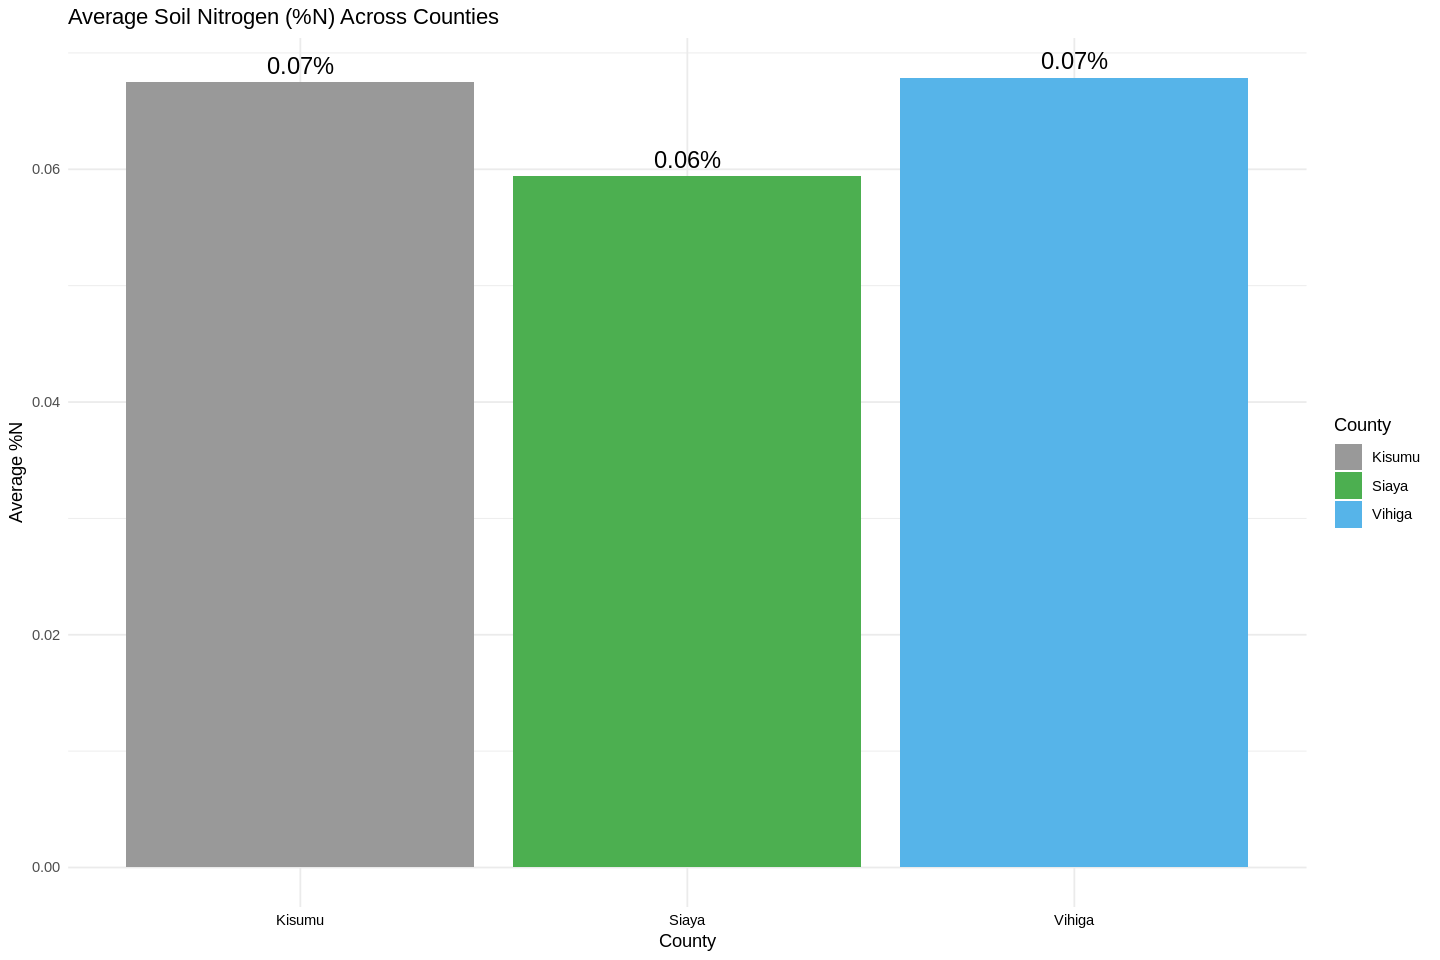

In [92]:
avg_N_county <- soil_data %>%
  group_by(County) %>%
  summarise(mean_N = mean(`%N`, na.rm = TRUE))

# Create the bar plot and add percentage labels
ggplot(avg_N_county, aes(x = County, y = mean_N, fill = County)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(mean_N, 2), "%")), vjust = -0.5, size = 5, colour = "black") +
  scale_fill_manual(values = c("#999999", "#4CAF50", "#56B4E9")) +
  labs(title = "Average Soil Nitrogen (%N) Across Counties", x = "County", y = "Average %N") +
  theme_minimal() +
  theme(axis.text.x = element_text(colour = "black"))

## Comparing average %N Performance across counties with boxplots

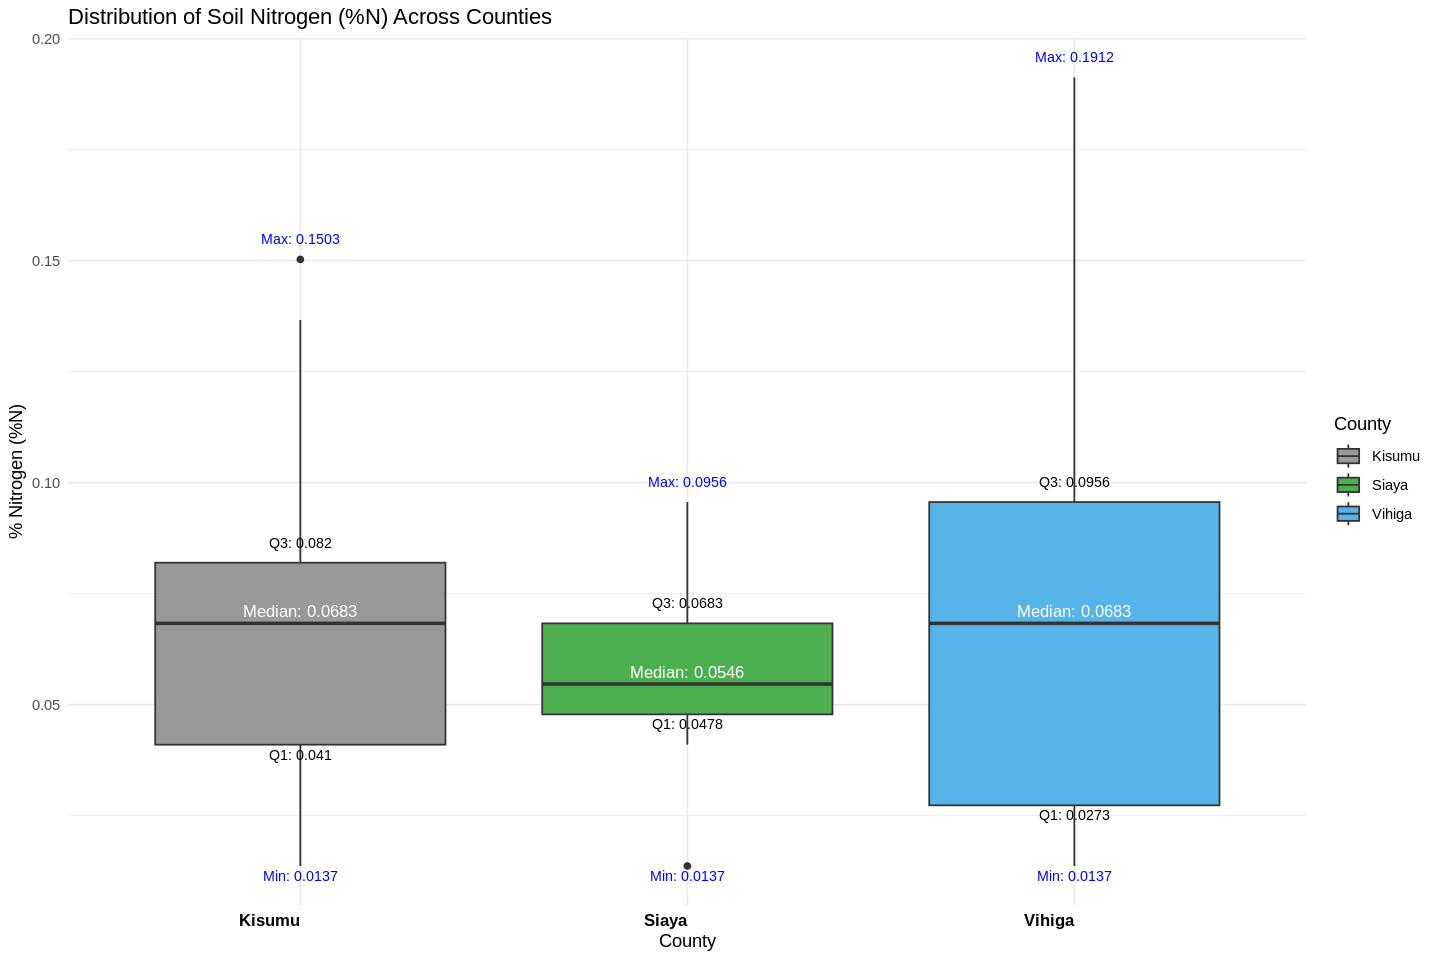

In [93]:
# Calculate box plot statistics (Q1, Q3, median, whiskers) for each County
box_stats <- soil_data %>%
  group_by(County) %>%
  summarise(
    Median = median(`%N`, na.rm = TRUE),
    Q1 = quantile(`%N`, 0.25, na.rm = TRUE),
    Q3 = quantile(`%N`, 0.75, na.rm = TRUE),
    Min = min(`%N`, na.rm = TRUE),
    Max = max(`%N`, na.rm = TRUE)
  )

# Create the boxplot and annotate the calculated statistics
ggplot(soil_data, aes(x = County, y = `%N`, fill = County)) +
  geom_boxplot() +  # Boxplot to show the distribution

  # Annotate the box plot with calculated statistics (Q1, Q3, median, min, max)
  geom_text(data = box_stats, aes(label = paste0("Median: ", round(Median, 4)), y = Median),
            color = "white", vjust = -0.5, size = 3.5) +

  geom_text(data = box_stats, aes(label = paste0("Q1: ", round(Q1, 4)), y = Q1),
            color = "black", vjust = 1.5, size = 3) +

  geom_text(data = box_stats, aes(label = paste0("Q3: ", round(Q3, 4)), y = Q3),
            color = "black", vjust = -1.5, size = 3) +

  geom_text(data = box_stats, aes(label = paste0("Min: ", round(Min, 4)), y = Min),
            color = "blue", vjust = 1.5, size = 3) +

  geom_text(data = box_stats, aes(label = paste0("Max: ", round(Max, 4)), y = Max),
            color = "blue", vjust = -1.5, size = 3) +

  scale_fill_manual(values = c("#999999", "#4CAF50", "#56B4E9")) +
  labs(title = "Distribution of Soil Nitrogen (%N) Across Counties",
       x = "County",
       y = "% Nitrogen (%N)") +
  theme_minimal() +
  theme(axis.text.x = element_text(hjust = 1, color = "black", size = 10, face = "bold"))

## Comparing average Phosphorus Performace across counties

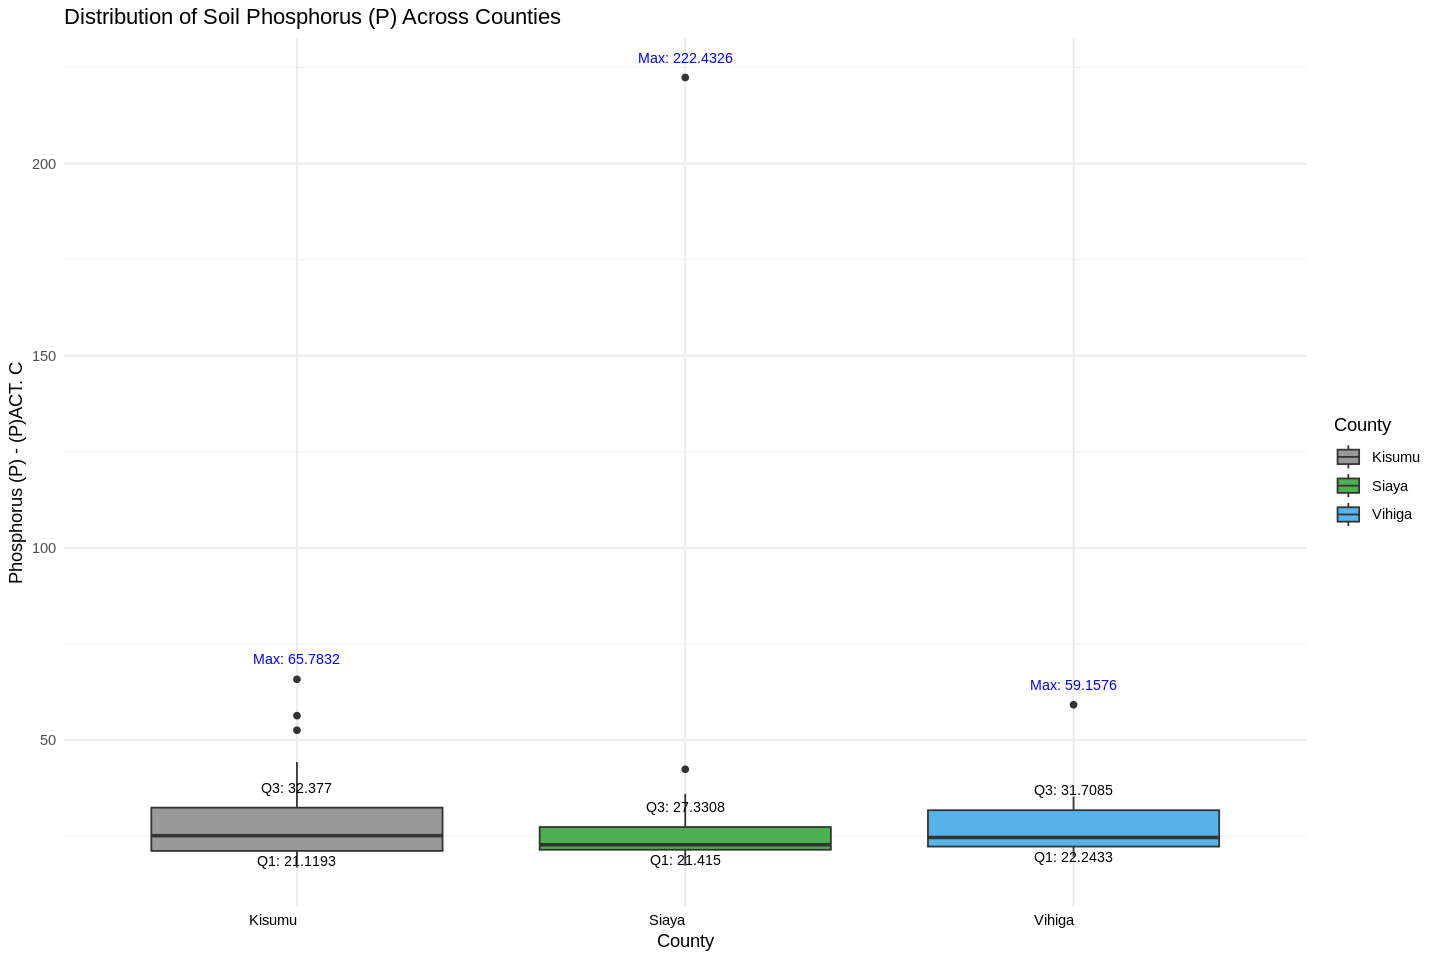

In [94]:
# Calculate box plot statistics (Q1, Q3, median, whiskers) for each County and Phosphorus (P)
box_stats_phosphorus <- soil_data %>%
  group_by(County) %>%
  summarise(
    Median = median(`(P)ACT. C`, na.rm = TRUE),
    Q1 = quantile(`(P)ACT. C`, 0.25, na.rm = TRUE),
    Q3 = quantile(`(P)ACT. C`, 0.75, na.rm = TRUE),
    Min = min(`(P)ACT. C`, na.rm = TRUE),
    Max = max(`(P)ACT. C`, na.rm = TRUE)
  )

# Create the boxplot and annotate the calculated statistics
ggplot(soil_data, aes(x = County, y = `(P)ACT. C`, fill = County)) +
  geom_boxplot() +  # Boxplot to show the distribution

  # Annotate the box plot with calculated statistics (Median, Q1, Q3, Max)

  geom_text(data = box_stats_phosphorus, aes(label = paste0("Q1: ", round(Q1, 4)), y = Q1),
            color = "black", vjust = 1.5, size = 3) +

  geom_text(data = box_stats_phosphorus, aes(label = paste0("Q3: ", round(Q3, 4)), y = Q3),
            color = "black", vjust = -1.5, size = 3) +

    geom_text(data = box_stats_phosphorus, aes(label = paste0("Max: ", round(Max, 4)), y = Max),
            color = "blue", vjust = -1.5, size = 3) +

  scale_fill_manual(values = c("#999999", "#4CAF50", "#56B4E9")) +
  labs(title = "Distribution of Soil Phosphorus (P) Across Counties",
       x = "County",
       y = "Phosphorus (P) - (P)ACT. C") +

  theme_minimal() +
  theme(axis.text.x = element_text(color = "black",hjust = 1))

## Comparing average Potassium Performance across counties

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”


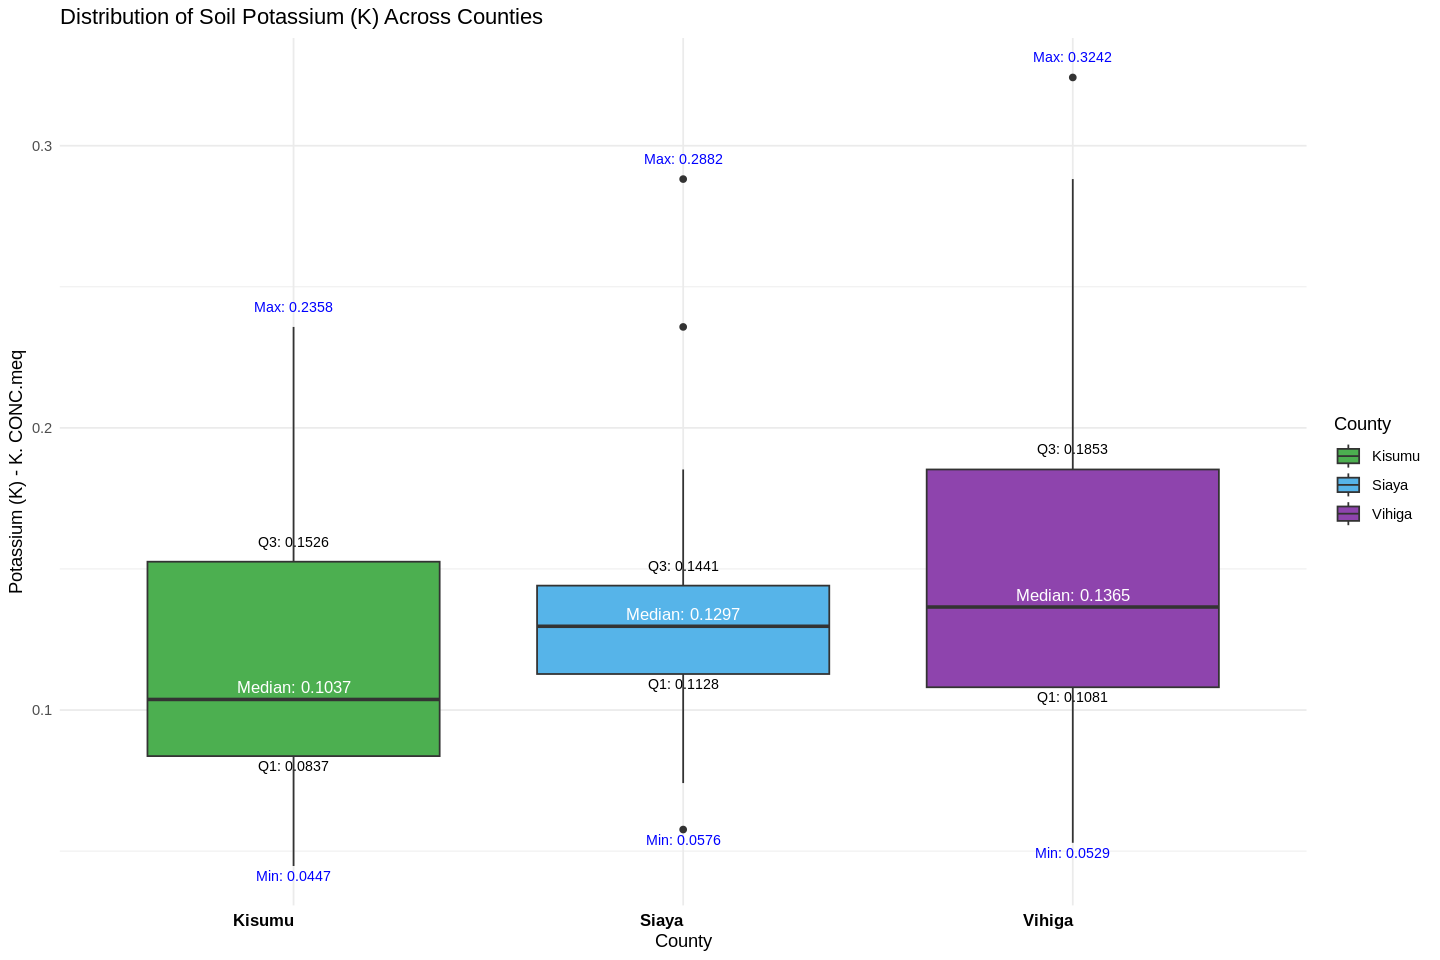

In [95]:
# Calculate box plot statistics (Q1, Q3, median, min, max) for each County and Potassium (K)
box_stats_potassium <- soil_data %>%
  group_by(County) %>%
  summarise(
    Median = median(`K. CONC.meq`, na.rm = TRUE),
    Q1 = quantile(`K. CONC.meq`, 0.25, na.rm = TRUE),
    Q3 = quantile(`K. CONC.meq`, 0.75, na.rm = TRUE),
    Min = min(`K. CONC.meq`, na.rm = TRUE),
    Max = max(`K. CONC.meq`, na.rm = TRUE)
  )

# Create the boxplot and annotate the calculated statistics
ggplot(soil_data, aes(x = County, y = `K. CONC.meq`, fill = County)) +
  geom_boxplot() +  # Boxplot to show the distribution

  # Annotate the box plot with calculated statistics (Median, Q1, Q3, Min, Max)
  geom_text(data = box_stats_potassium, aes(label = paste0("Median: ", round(Median, 4)), y = Median),
            color = "white", vjust = -0.5, size = 3.5) +

  geom_text(data = box_stats_potassium, aes(label = paste0("Q1: ", round(Q1, 4)), y = Q1),
            color = "black", vjust = 1.5, size = 3) +

  geom_text(data = box_stats_potassium, aes(label = paste0("Q3: ", round(Q3, 4)), y = Q3),
            color = "black", vjust = -1.5, size = 3) +

  geom_text(data = box_stats_potassium, aes(label = paste0("Min: ", round(Min, 4)), y = Min),
            color = "blue", vjust = 1.5, size = 3) +

  geom_text(data = box_stats_potassium, aes(label = paste0("Max: ", round(Max, 4)), y = Max),
            color = "blue", vjust = -1.5, size = 3) +

  scale_fill_manual(values = c("#4CAF50", "#56B4E9", "#8E44AD")) +
  labs(title = "Distribution of Soil Potassium (K) Across Counties",
       x = "County",
       y = "Potassium (K) - K. CONC.meq") +

  theme_minimal() +
  theme(axis.text.x = element_text(hjust = 1, color = "black", size = 10, face = "bold"))

## Comparing average Soil Organic Carbon Performance across counties

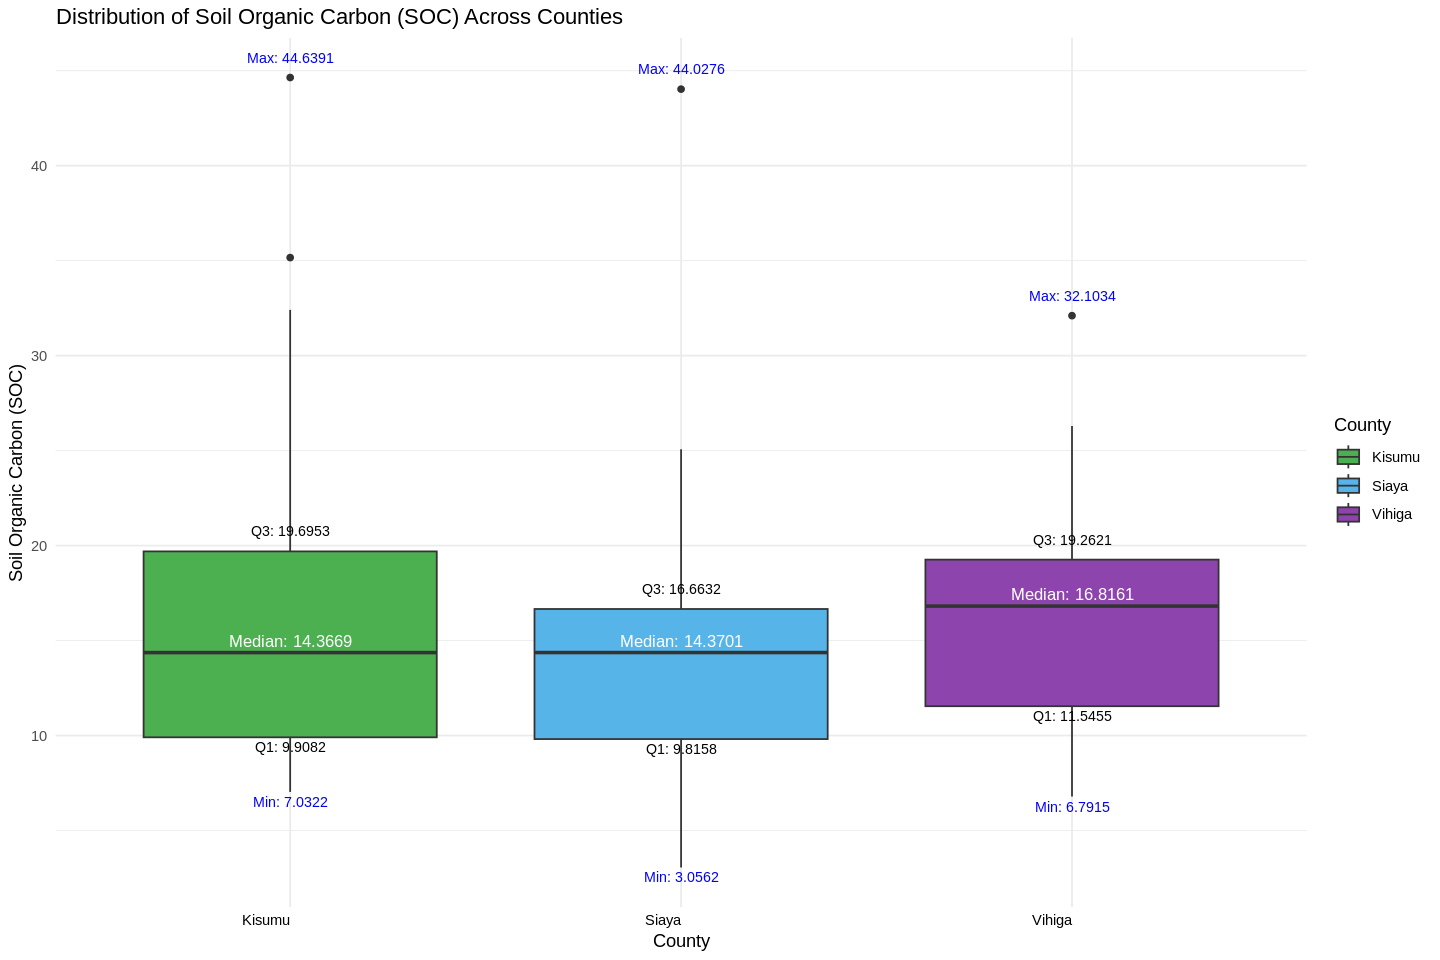

In [96]:
# Calculate box plot statistics (Q1, Q3, median, min, max) for Soil Organic Carbon (SOC) by County
box_stats_SOC <- soil_data %>%
  group_by(County) %>%
  summarise(
    Median = median(SOC, na.rm = TRUE),
    Q1 = quantile(SOC, 0.25, na.rm = TRUE),
    Q3 = quantile(SOC, 0.75, na.rm = TRUE),
    Min = min(SOC, na.rm = TRUE),
    Max = max(SOC, na.rm = TRUE)
  )

# Create the boxplot and annotate the calculated statistics
ggplot(soil_data, aes(x = County, y = SOC, fill = County)) +
  geom_boxplot() +  # Boxplot to show the distribution

  # Annotate the box plot with calculated statistics (Median, Q1, Q3, Min, Max)
  geom_text(data = box_stats_SOC, aes(label = paste0("Median: ", round(Median, 4)), y = Median),
            color = "white", vjust = -0.5, size = 3.5) +

  geom_text(data = box_stats_SOC, aes(label = paste0("Q1: ", round(Q1, 4)), y = Q1),
            color = "black", vjust = 1.5, size = 3) +

  geom_text(data = box_stats_SOC, aes(label = paste0("Q3: ", round(Q3, 4)), y = Q3),
            color = "black", vjust = -1.5, size = 3) +

  geom_text(data = box_stats_SOC, aes(label = paste0("Min: ", round(Min, 4)), y = Min),
            color = "blue", vjust = 1.5, size = 3) +

  geom_text(data = box_stats_SOC, aes(label = paste0("Max: ", round(Max, 4)), y = Max),
            color = "blue", vjust = -1.5, size = 3) +

  scale_fill_manual(values = c("#4CAF50", "#56B4E9", "#8E44AD")) +
  labs(title = "Distribution of Soil Organic Carbon (SOC) Across Counties",
       x = "County",
       y = "Soil Organic Carbon (SOC)") +

  theme_minimal() +
  theme(axis.text.x = element_text(color = "black",hjust = 1))

## Comparing average %Soil Organic Carbon Performance across counties

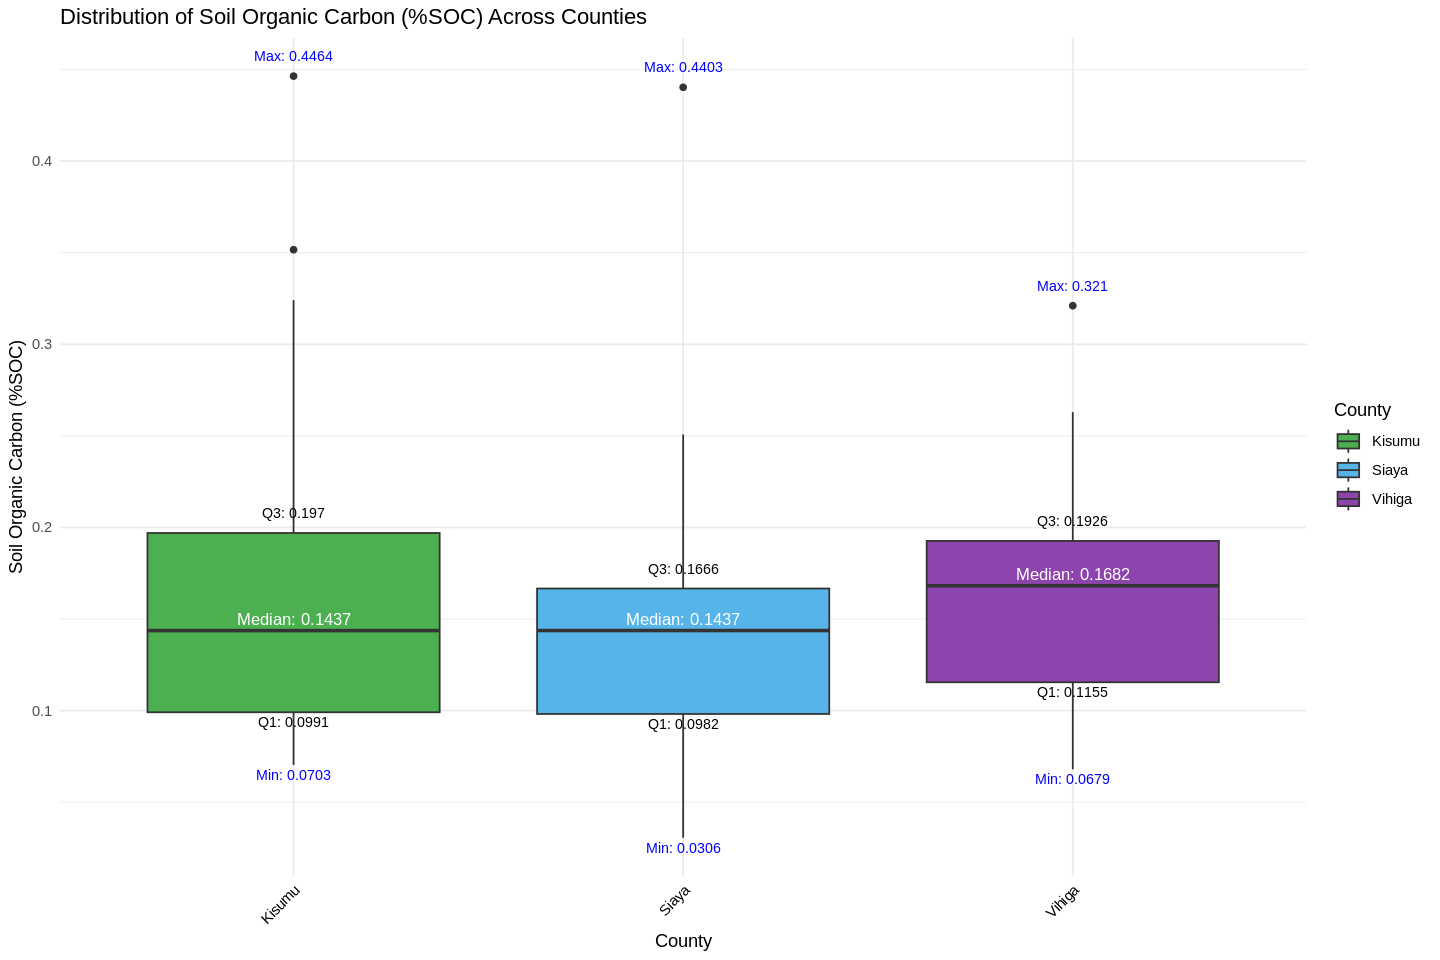

In [97]:
# Calculate box plot statistics for %SOC by County
box_stats_SOC_percent <- soil_data %>%
  group_by(County) %>%
  summarise(
    Median = median(`%SOC`, na.rm = TRUE),
    Q1 = quantile(`%SOC`, 0.25, na.rm = TRUE),
    Q3 = quantile(`%SOC`, 0.75, na.rm = TRUE),
    Min = min(`%SOC`, na.rm = TRUE),
    Max = max(`%SOC`, na.rm = TRUE)
  )

# Create the boxplot and annotate the calculated statistics
ggplot(soil_data, aes(x = County, y = `%SOC`, fill = County)) +
  geom_boxplot() +  # Boxplot to show distribution

  # Annotate the box plot with calculated statistics (Median, Q1, Q3, Min, Max)
  geom_text(data = box_stats_SOC_percent, aes(label = paste0("Median: ", round(Median, 4)), y = Median),
            color = "white", vjust = -0.5, size = 3.5) +

  geom_text(data = box_stats_SOC_percent, aes(label = paste0("Q1: ", round(Q1, 4)), y = Q1),
            color = "black", vjust = 1.5, size = 3) +

  geom_text(data = box_stats_SOC_percent, aes(label = paste0("Q3: ", round(Q3, 4)), y = Q3),
            color = "black", vjust = -1.5, size = 3) +

  geom_text(data = box_stats_SOC_percent, aes(label = paste0("Min: ", round(Min, 4)), y = Min),
            color = "blue", vjust = 1.5, size = 3) +

  geom_text(data = box_stats_SOC_percent, aes(label = paste0("Max: ", round(Max, 4)), y = Max),
            color = "blue", vjust = -1.5, size = 3) +

  scale_fill_manual(values = c("#4CAF50", "#56B4E9", "#8E44AD")) +
  labs(title = "Distribution of Soil Organic Carbon (%SOC) Across Counties",
       x = "County",
       y = "Soil Organic Carbon (%SOC)") +

  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45,color = "black", hjust = 1))

## Comparing average pH Performance across counties

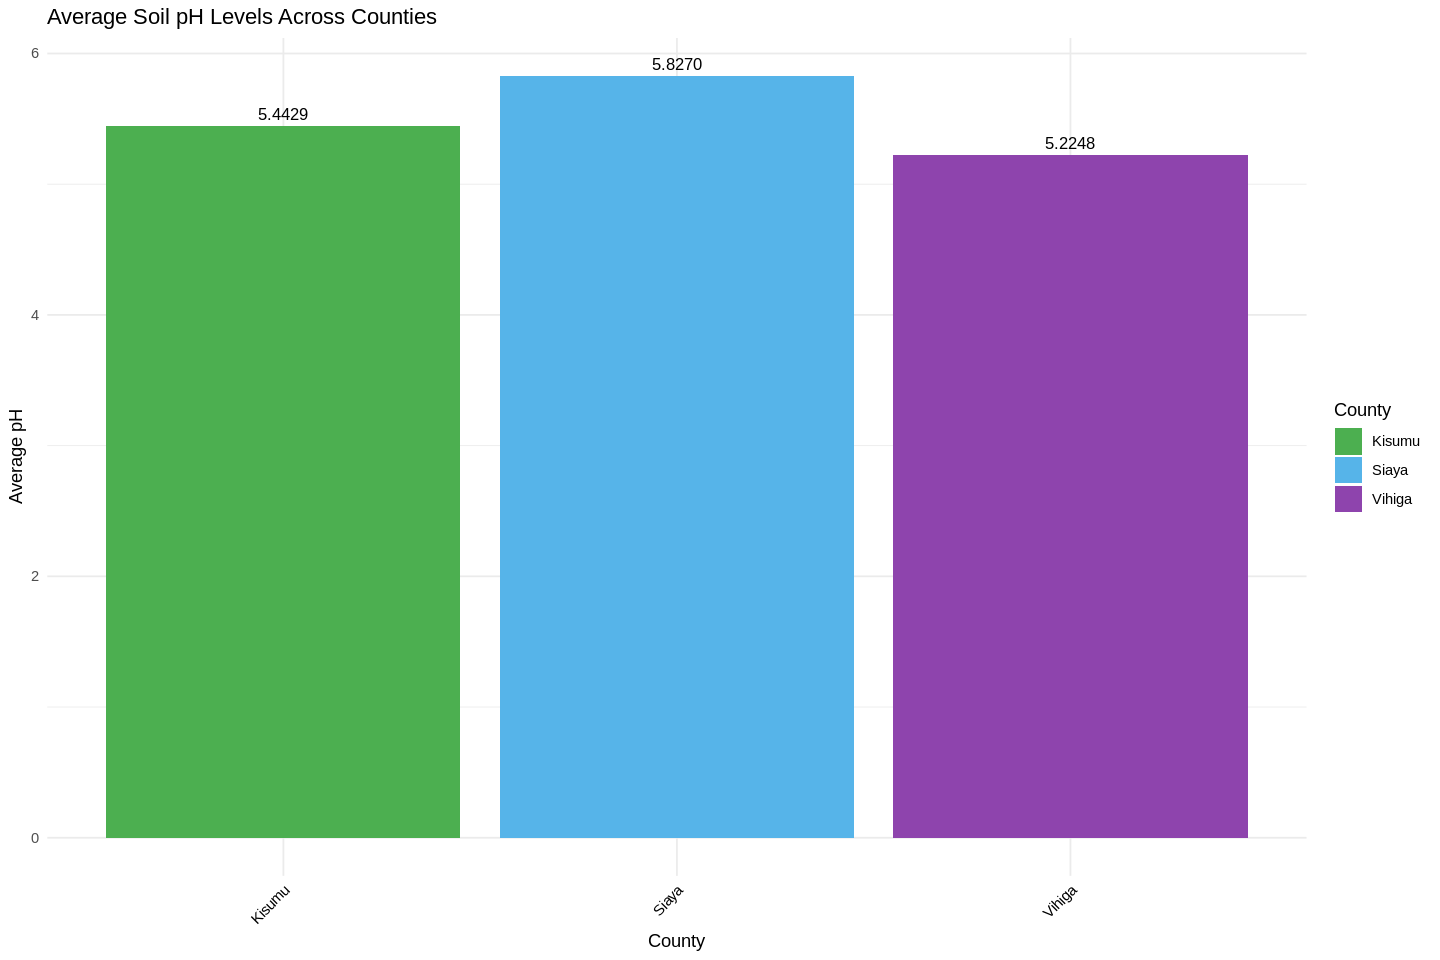

In [98]:
# Calculate mean pH per county
avg_pH_county <- soil_data %>%
  group_by(County) %>%
  summarise(mean_pH = mean(pH, na.rm = TRUE))

# Bar graph with labels showing exact mean pH values
ggplot(avg_pH_county, aes(x = County, y = mean_pH, fill = County)) +
  geom_bar(stat = "identity") +  # Create bar plot
  geom_text(aes(label = sprintf("%.4f", mean_pH)),  # Display mean pH with 4 decimal places
            vjust = -0.5, size = 3.5) +  # Positioning the text slightly above the bar
  scale_fill_manual(values = c("#4CAF50", "#56B4E9", "#8E44AD")) +
  labs(title = "Average Soil pH Levels Across Counties",
       x = "County",
       y = "Average pH") +
  theme_minimal() +
  theme(axis.text.x = element_text(color = "black",angle = 45, hjust = 1))

## Comparing average EC Performance across counties

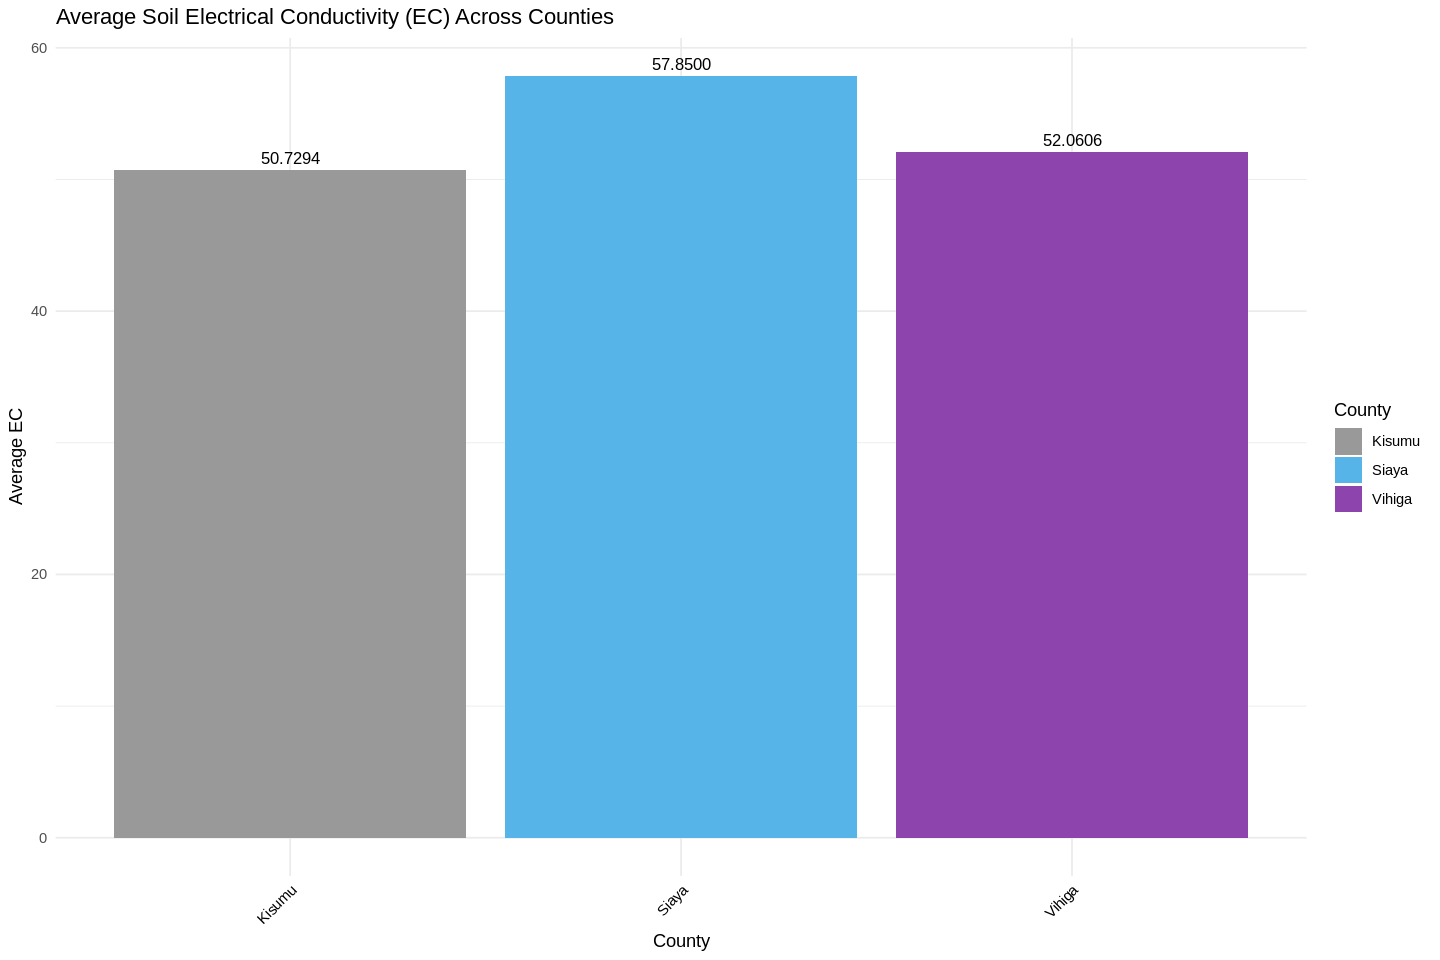

In [99]:
# Calculate mean EC per county
avg_EC_county <- soil_data %>%
  group_by(County) %>%
  summarise(mean_EC = mean(EC, na.rm = TRUE))

# Bar graph with labels showing exact mean EC values
ggplot(avg_EC_county, aes(x = County, y = mean_EC, fill = County)) +
  geom_bar(stat = "identity") +  # Create bar plot
  geom_text(aes(label = sprintf("%.4f", mean_EC)),  # Display mean EC with 4 decimal places
            vjust = -0.5, size = 3.5) +  # Positioning the text slightly above the bar
  scale_fill_manual(values = c("#999999", "#56B4E9", "#8E44AD")) +
  labs(title = "Average Soil Electrical Conductivity (EC) Across Counties",
       x = "County",
       y = "Average EC") +
  theme_minimal() +
  theme(axis.text.x = element_text(color = "black",angle = 45, hjust = 1))

## Comparing average Calcium Performance across counties

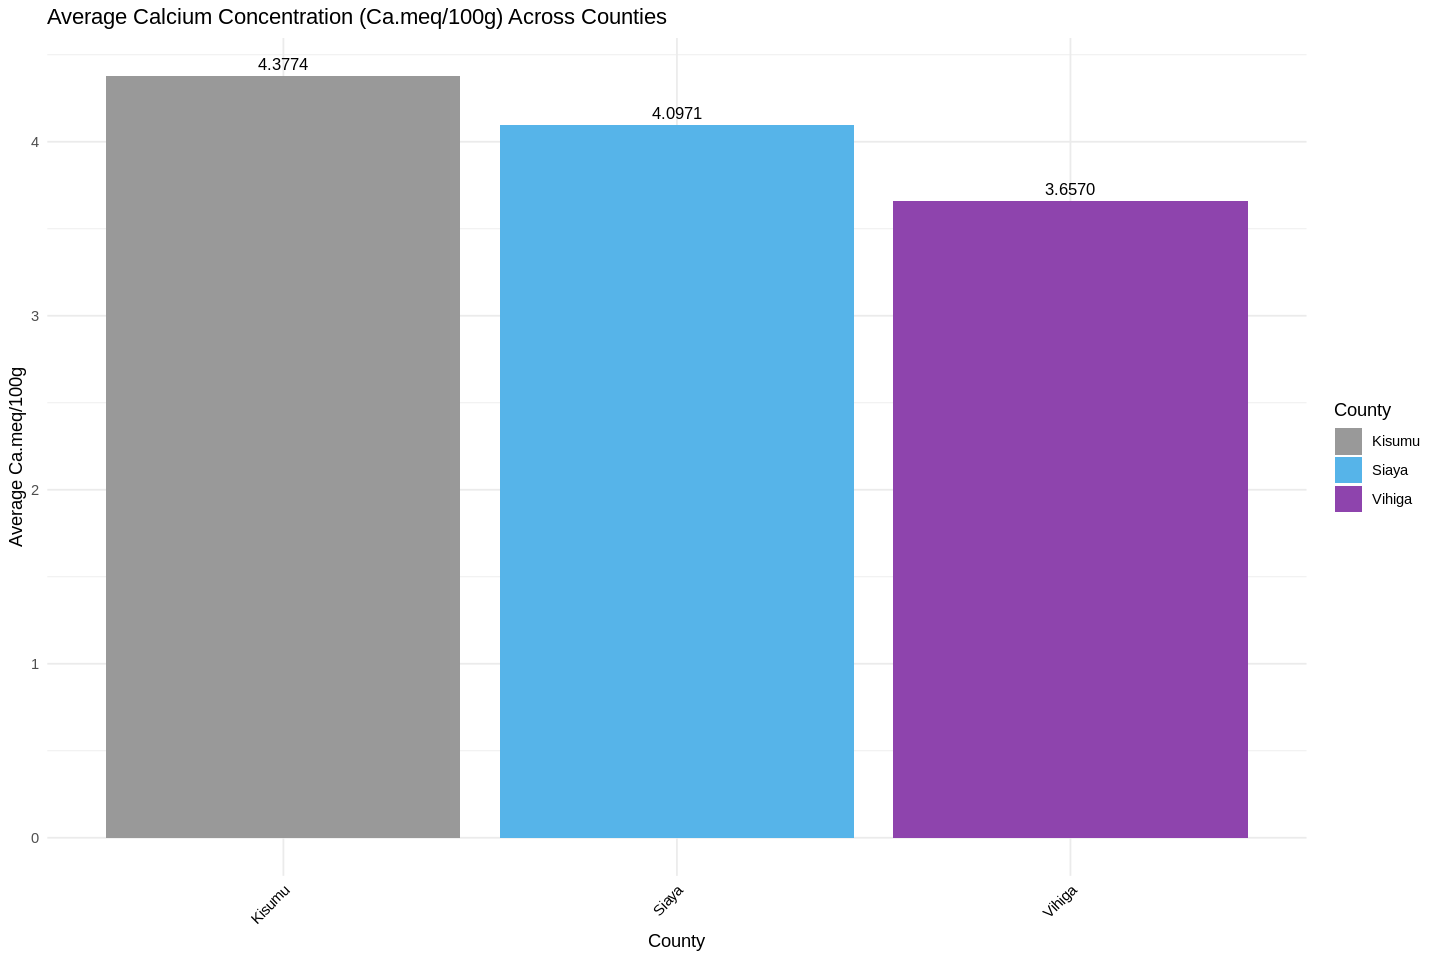

In [100]:
# Calculate mean Ca.meq/100g per county
avg_Ca_county <- soil_data %>%
  group_by(County) %>%
  summarise(mean_Ca = mean(`Ca.meq/100g`, na.rm = TRUE))

# Bar graph with labels showing exact mean Ca values
ggplot(avg_Ca_county, aes(x = County, y = mean_Ca, fill = County)) +
  geom_bar(stat = "identity") +  # Create bar plot
  geom_text(aes(label = sprintf("%.4f", mean_Ca)),  # Display mean Ca with 4 decimal places
            vjust = -0.5, size = 3.5) +  # Position text slightly above the bar
  scale_fill_manual(values = c("#999999", "#56B4E9", "#8E44AD")) +
  labs(title = "Average Calcium Concentration (Ca.meq/100g) Across Counties",
       x = "County",
       y = "Average Ca.meq/100g") +
  theme_minimal() +
  theme(axis.text.x = element_text(color = "black",angle = 45, hjust = 1))

## Comparing average Magnesium Performance across counties

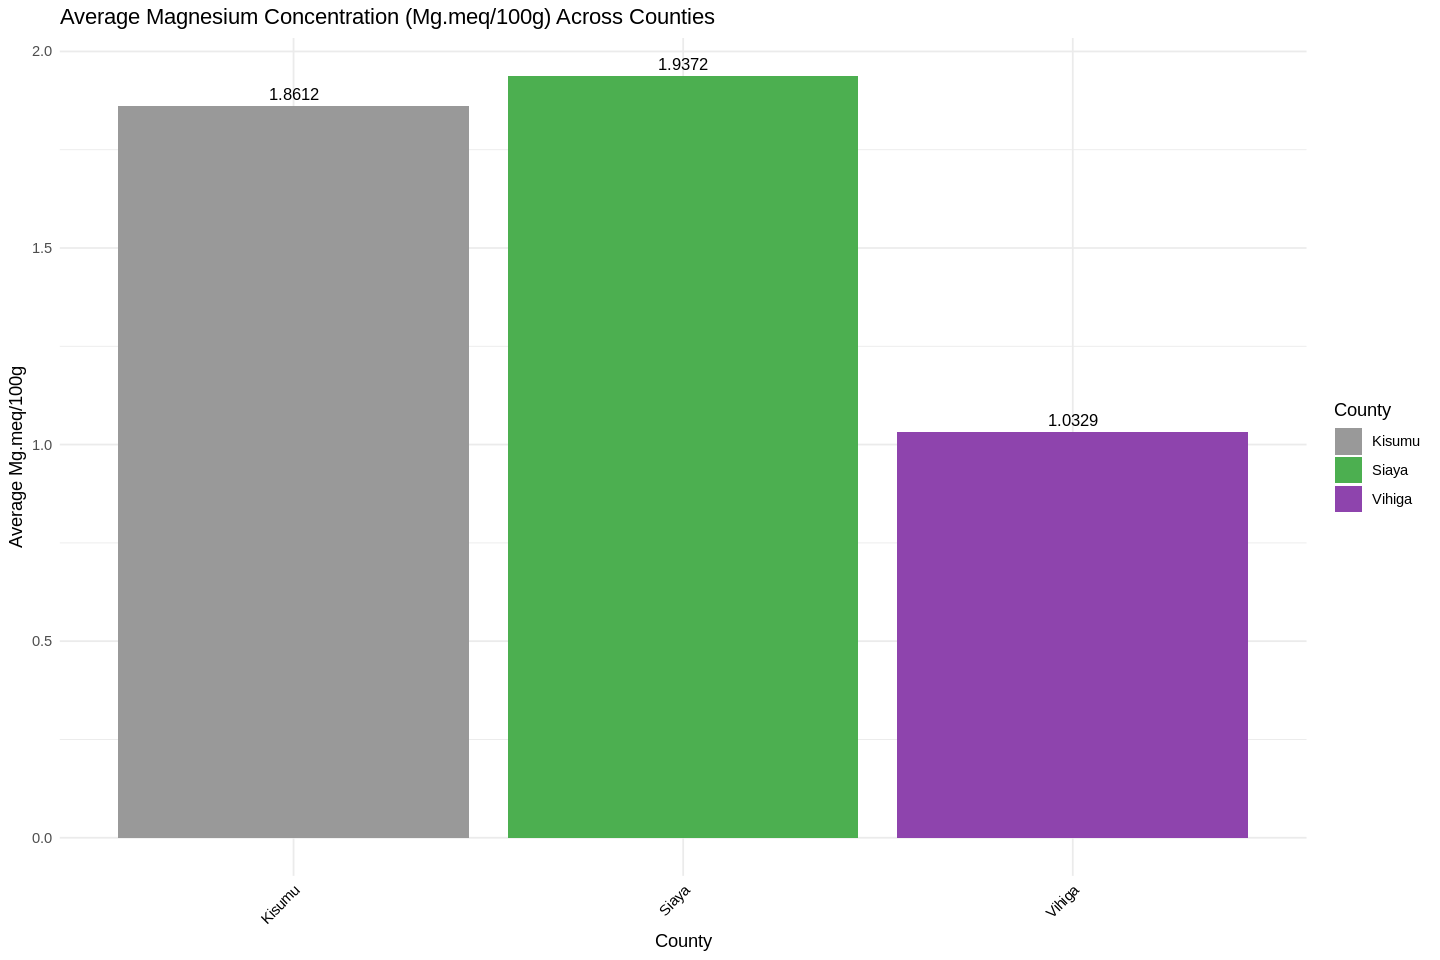

In [101]:
# Calculate mean Mg.meq/100g per county
avg_Mg_county <- soil_data %>%
  group_by(County) %>%
  summarise(mean_Mg = mean(`Mg.meq/100g`, na.rm = TRUE))

# Bar graph with labels showing exact mean Mg values
ggplot(avg_Mg_county, aes(x = County, y = mean_Mg, fill = County)) +
  geom_bar(stat = "identity") +  # Create bar plot
  geom_text(aes(label = sprintf("%.4f", mean_Mg)),  # Display mean Mg with 4 decimal places
            vjust = -0.5, size = 3.5) +  # Position text slightly above the bar
  scale_fill_manual(values = c("#999999", "#4CAF50", "#8E44AD")) +
  labs(title = "Average Magnesium Concentration (Mg.meq/100g) Across Counties",
       x = "County",
       y = "Average Mg.meq/100g") +
  theme_minimal() +
  theme(axis.text.x = element_text(color = "black",angle = 45, hjust = 1))

## Comparing average Iron Performance across counties

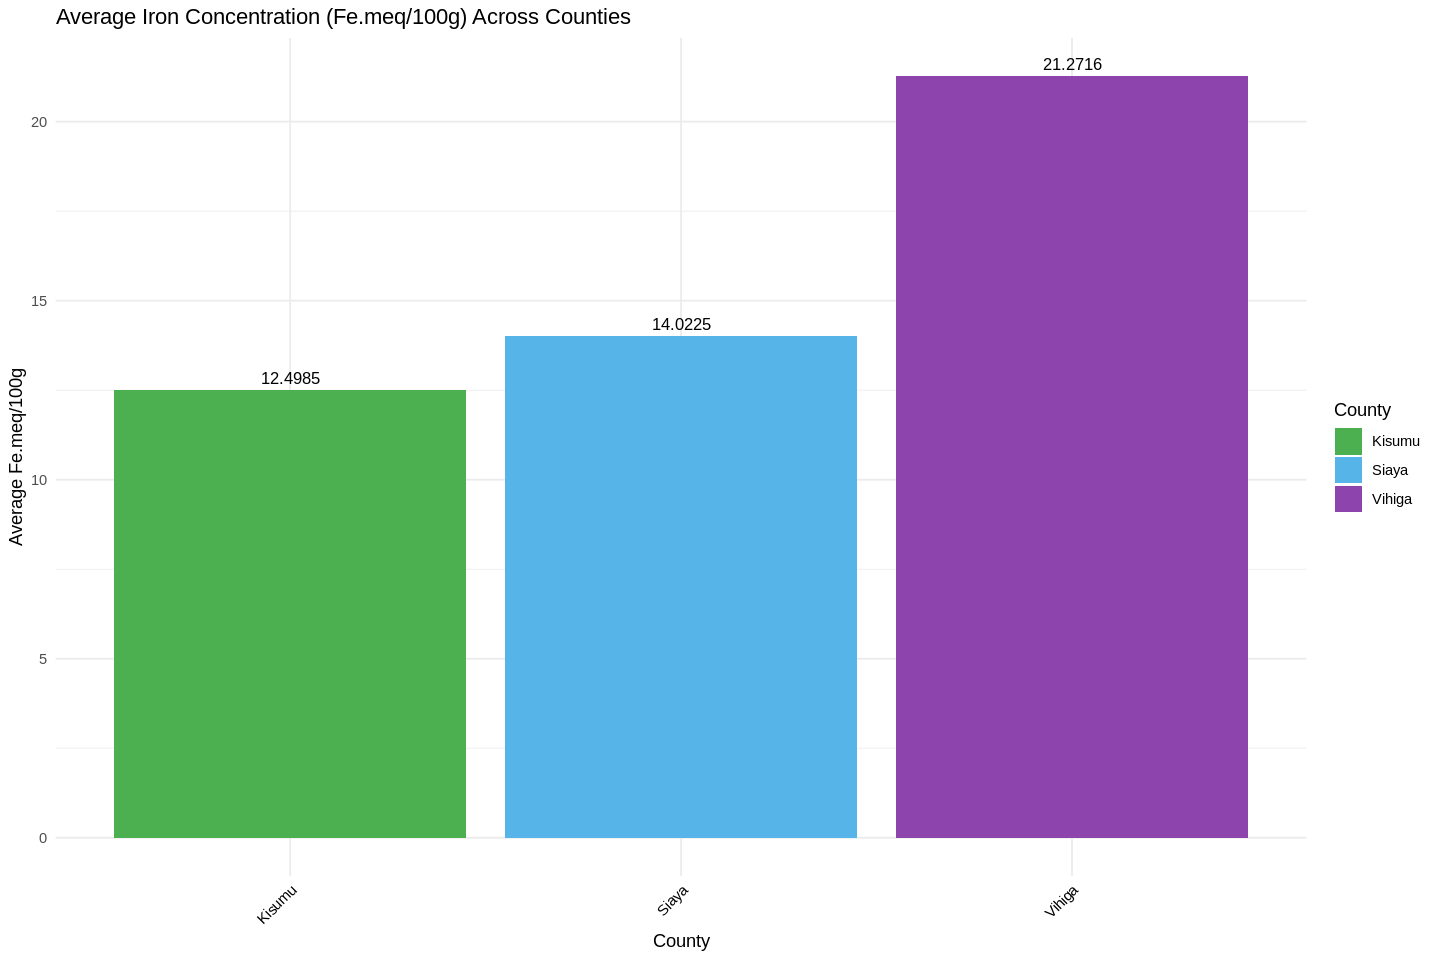

In [102]:
# Calculate mean Fe.meq/100g per county
avg_Fe_county <- soil_data %>%
  group_by(County) %>%
  summarise(mean_Fe = mean(`Fe.meq/100g`, na.rm = TRUE))

# Bar graph with labels showing exact mean Fe values
ggplot(avg_Fe_county, aes(x = County, y = mean_Fe, fill = County)) +
  geom_bar(stat = "identity") +  # Create bar plot
  geom_text(aes(label = sprintf("%.4f", mean_Fe)),  # Display mean Fe with 4 decimal places
            vjust = -0.5, size = 3.5) +  # Position text slightly above the bar
  scale_fill_manual(values = c("#4CAF50", "#56B4E9", "#8E44AD")) +
  labs(title = "Average Iron Concentration (Fe.meq/100g) Across Counties",
       x = "County",
       y = "Average Fe.meq/100g") +
  theme_minimal() +
  theme(axis.text.x = element_text(color = "black",angle = 45, hjust = 1))

## Comparing average Zinc Performace across counties

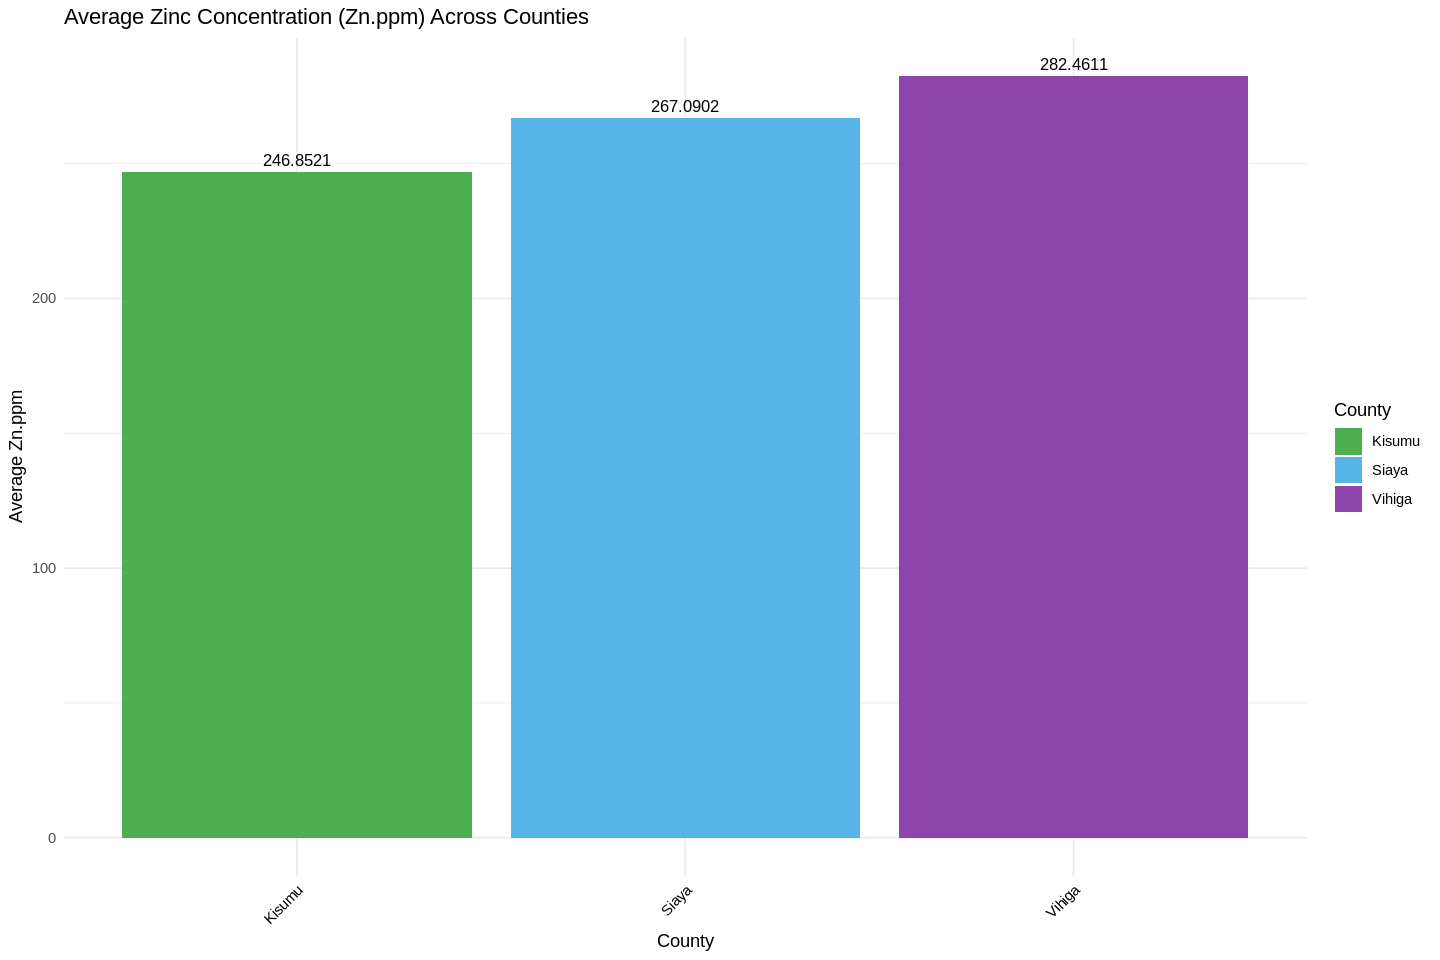

In [103]:
# Calculate mean Zn.ppm per county
avg_Zn_county <- soil_data %>%
  group_by(County) %>%
  summarise(mean_Zn = mean(`Zn.ppm`, na.rm = TRUE))

# Bar graph with labels showing exact mean Zn values
ggplot(avg_Zn_county, aes(x = County, y = mean_Zn, fill = County)) +
  geom_bar(stat = "identity") +  # Create bar plot
  geom_text(aes(label = sprintf("%.4f", mean_Zn)),  # Display mean Zn with 4 decimal places
            vjust = -0.5, size = 3.5) +  # Position text slightly above the bar
  scale_fill_manual(values = c("#4CAF50", "#56B4E9", "#8E44AD")) +
  labs(title = "Average Zinc Concentration (Zn.ppm) Across Counties",
       x = "County",
       y = "Average Zn.ppm") +
  theme_minimal() +
  theme(axis.text.x = element_text(color = "black",angle = 45, hjust = 1))

# VARIATIONS ACROSS TREATMENTS

## Comparing average pH in relation to the different Treatments

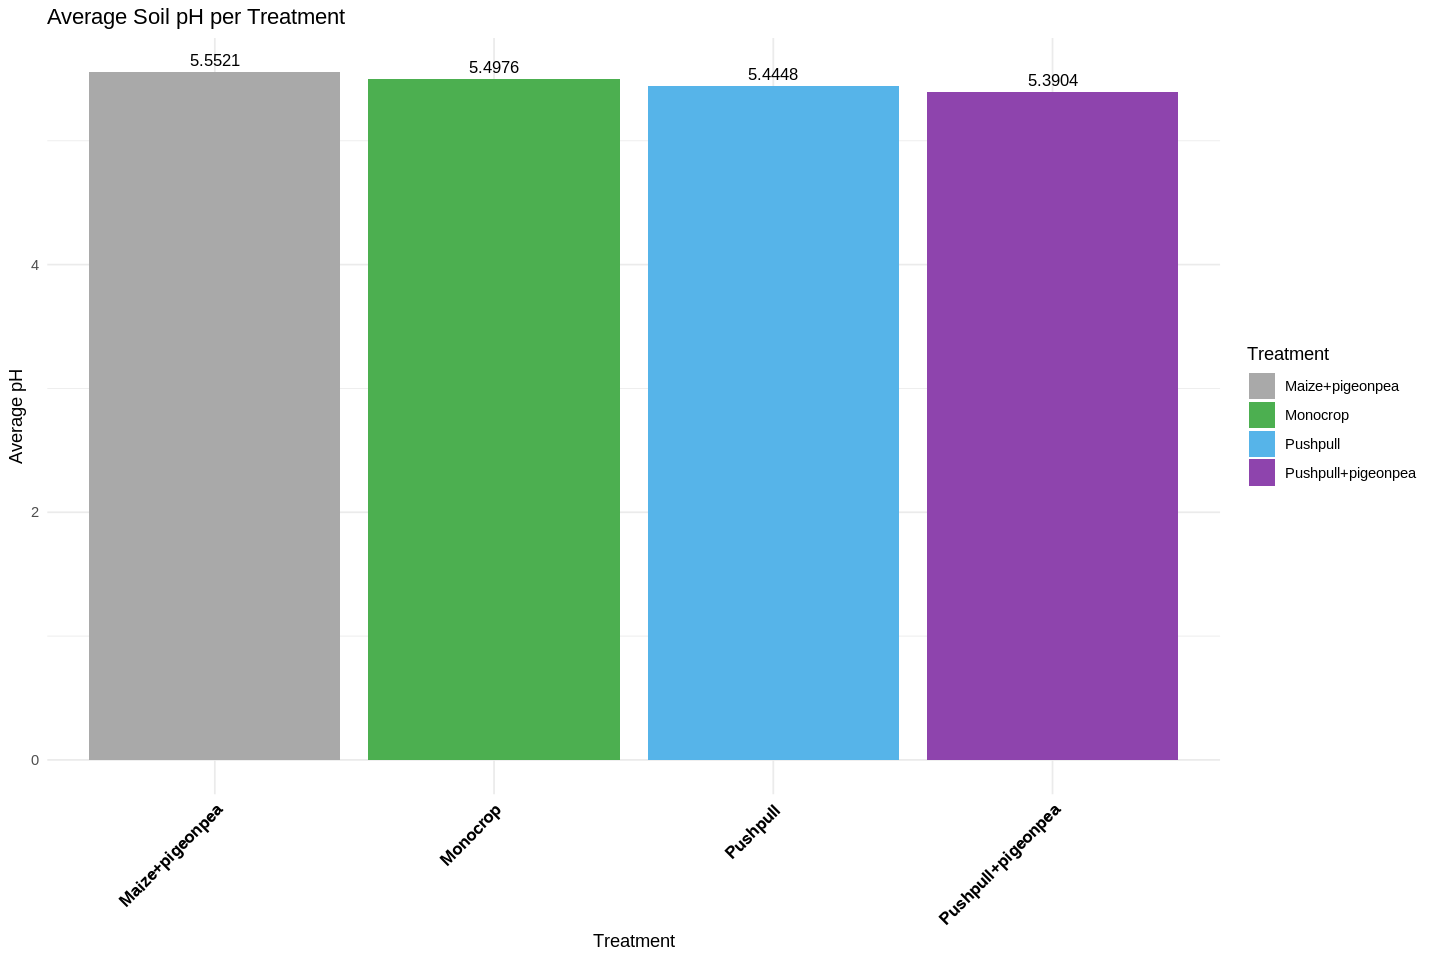

In [104]:
# Calculate mean pH per treatment
avg_pH_treatment <- soil_data %>%
  group_by(Treatment) %>%
  summarise(mean_pH = mean(pH, na.rm = TRUE))

# Bar graph with labels showing exact mean pH values and darker x-axis text
ggplot(avg_pH_treatment, aes(x = Treatment, y = mean_pH, fill = Treatment)) +
  geom_bar(stat = "identity") +  # Create bar plot
  geom_text(aes(label = sprintf("%.4f", mean_pH)),  # Display mean pH with 4 decimal places
            vjust = -0.5, size = 3.5) +  # Position text slightly above the bar
  scale_fill_manual(values = c("#A9A9A9", "#4CAF50", "#56B4E9", "#8E44AD")) +
  labs(title = "Average Soil pH per Treatment",
       x = "Treatment",
       y = "Average pH") +
  theme_minimal() +
  theme(axis.text.x = element_text(color = "black", size = 10, face = "bold", angle = 45, hjust = 1))

## Comparing average EC in relation to the different Treatments

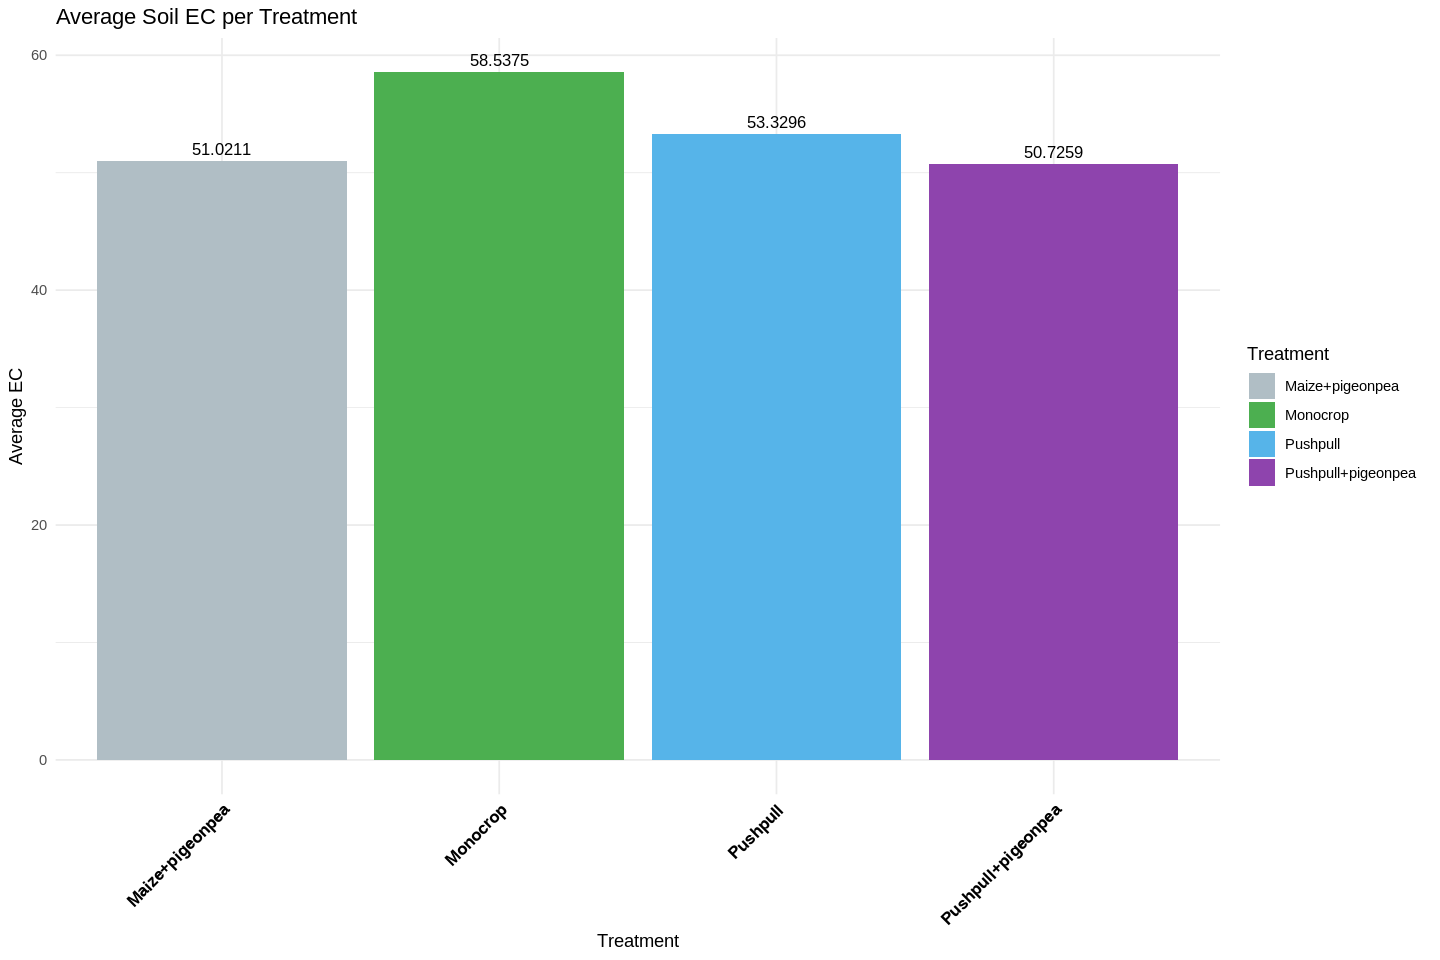

In [105]:
# Calculate mean EC per treatment
avg_EC_treatment <- soil_data %>%
  group_by(Treatment) %>%
  summarise(mean_EC = mean(EC, na.rm = TRUE))

# Bar graph with labels and darker x-axis text
ggplot(avg_EC_treatment, aes(x = Treatment, y = mean_EC, fill = Treatment)) +
  geom_bar(stat = "identity") +  # Create bar plot
  geom_text(aes(label = sprintf("%.4f", mean_EC)),  # Display mean EC with 4 decimal places
            vjust = -0.5, size = 3.5) +  # Position text slightly above the bar
  scale_fill_manual(values = c("#B0BEC5", "#4CAF50", "#56B4E9", "#8E44AD")) +
  labs(title = "Average Soil EC per Treatment",
       x = "Treatment",
       y = "Average EC") +
  theme_minimal() +
  theme(axis.text.x = element_text(color = "black", size = 10, face = "bold", angle = 45, hjust = 1))

## Comparing average SOC in relation to the different Treatments

Warning message in geom_text(data = box_stats_SOC_treatment, aes(label = paste0("Q1: ", :
“Ignoring unknown parameters: `face`”
Warning message in geom_text(data = box_stats_SOC_treatment, aes(label = paste0("Q3: ", :
“Ignoring unknown parameters: `face`”


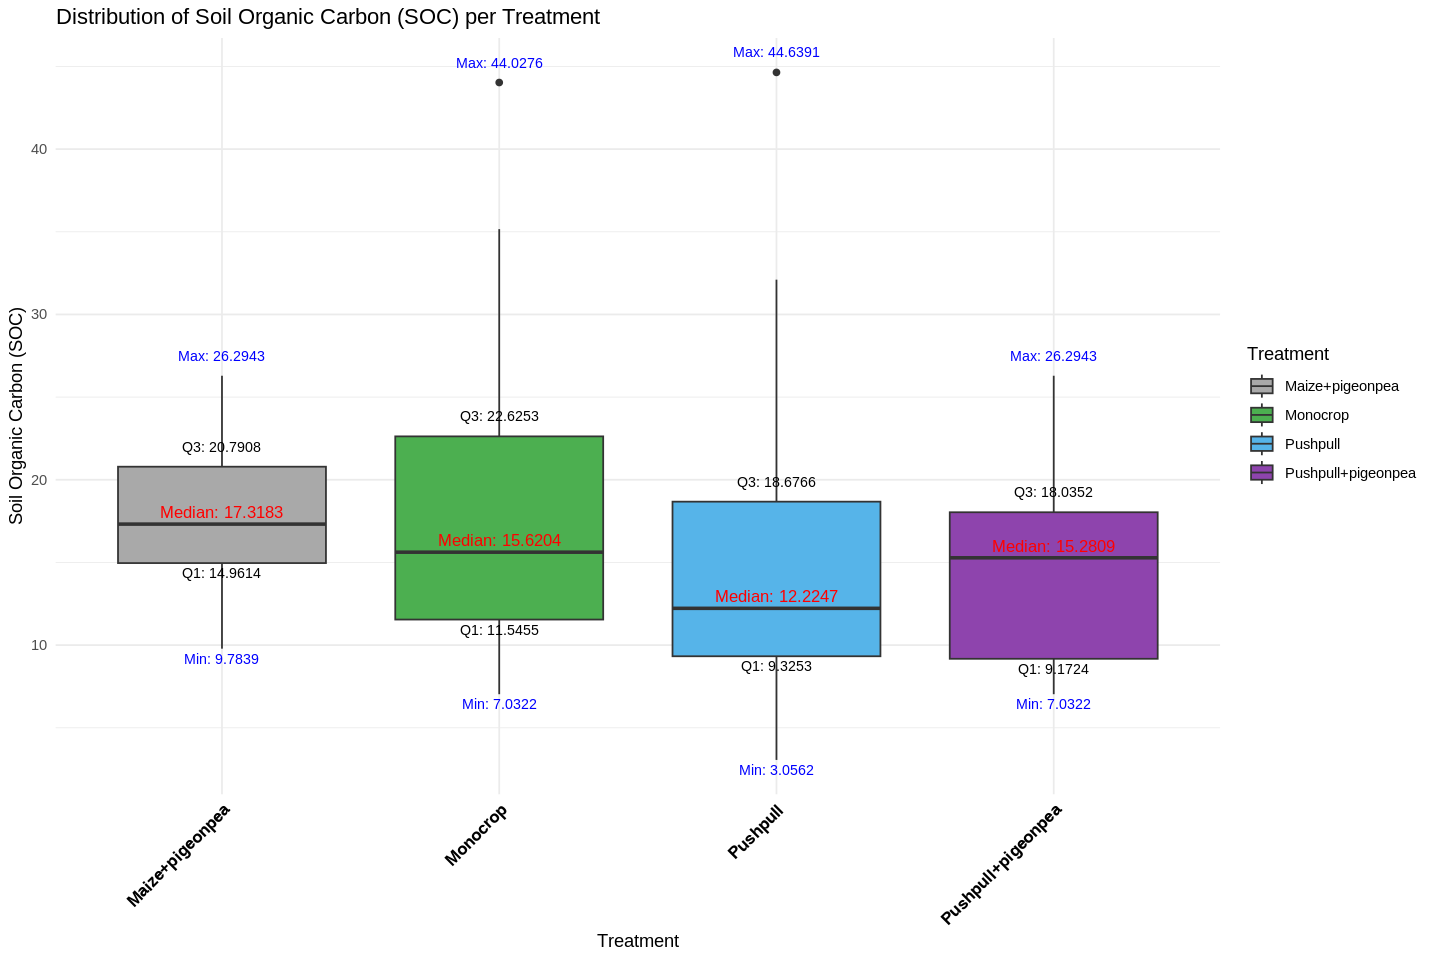

In [108]:
# Calculate box plot statistics for SOC per Treatment
box_stats_SOC_treatment <- soil_data %>%
  group_by(Treatment) %>%
  summarise(
    Median = median(SOC, na.rm = TRUE),
    Q1 = quantile(SOC, 0.25, na.rm = TRUE),
    Q3 = quantile(SOC, 0.75, na.rm = TRUE),
    Min = min(SOC, na.rm = TRUE),
    Max = max(SOC, na.rm = TRUE)
  )

# Create the boxplot and annotate the calculated statistics
ggplot(soil_data, aes(x = Treatment, y = SOC, fill = Treatment)) +
  geom_boxplot() +  # Boxplot to show distribution

  # Annotate the box plot with calculated statistics (Median, Q1, Q3, Min, Max)
  geom_text(data = box_stats_SOC_treatment, aes(label = paste0("Median: ", round(Median, 4)), y = Median),
            color = "red", vjust = -0.5, size = 3.5) +

  geom_text(data = box_stats_SOC_treatment, aes(label = paste0("Q1: ", round(Q1, 4)), y = Q1),
            color = "black", face = "bold", vjust = 1.5, size = 3) +

  geom_text(data = box_stats_SOC_treatment, aes(label = paste0("Q3: ", round(Q3, 4)), y = Q3),
            color = "black",face = "bold", vjust = -1.5, size = 3) +

  geom_text(data = box_stats_SOC_treatment, aes(label = paste0("Min: ", round(Min, 4)), y = Min),
            color = "blue", vjust = 1.5, size = 3) +

  geom_text(data = box_stats_SOC_treatment, aes(label = paste0("Max: ", round(Max, 4)), y = Max),
            color = "blue", vjust = -1.5, size = 3) +

  scale_fill_manual(values = c("#A9A9A9", "#4CAF50", "#56B4E9", "#8E44AD")) +
  labs(title = "Distribution of Soil Organic Carbon (SOC) per Treatment",
       x = "Treatment",
       y = "Soil Organic Carbon (SOC)") +

  theme_minimal() +
  theme(axis.text.x = element_text(color = "black", size = 10, face = "bold", angle = 45, hjust = 1))

## Comparing average %SOC in relation to the different Treatments

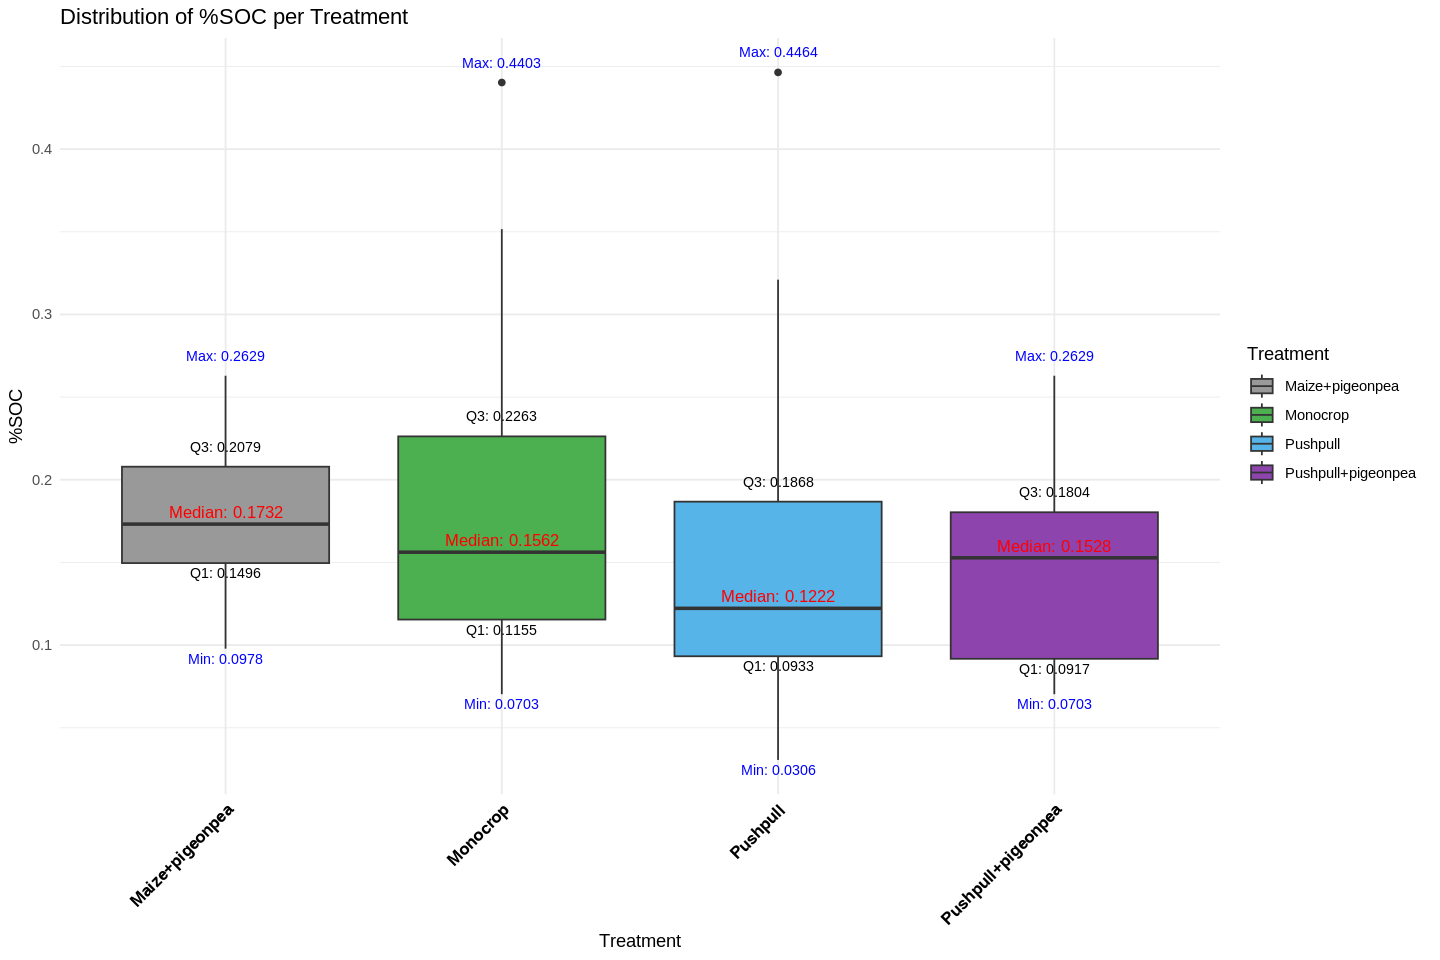

In [109]:
# Calculate box plot statistics for %SOC per Treatment
box_stats_SOC_percent_treatment <- soil_data %>%
  group_by(Treatment) %>%
  summarise(
    Median = median(`%SOC`, na.rm = TRUE),
    Q1 = quantile(`%SOC`, 0.25, na.rm = TRUE),
    Q3 = quantile(`%SOC`, 0.75, na.rm = TRUE),
    Min = min(`%SOC`, na.rm = TRUE),
    Max = max(`%SOC`, na.rm = TRUE)
  )

# Create the boxplot and annotate calculated statistics
ggplot(soil_data, aes(x = Treatment, y = `%SOC`, fill = Treatment)) +
  geom_boxplot() +  # Boxplot to show distribution

  # Annotate box plot with statistics (Median, Q1, Q3, Min, Max)
  geom_text(data = box_stats_SOC_percent_treatment, aes(label = paste0("Median: ", round(Median, 4)), y = Median),
            color = "red", vjust = -0.5, size = 3.5) +

  geom_text(data = box_stats_SOC_percent_treatment, aes(label = paste0("Q1: ", round(Q1, 4)), y = Q1),
            color = "black", vjust = 1.5, size = 3) +

  geom_text(data = box_stats_SOC_percent_treatment, aes(label = paste0("Q3: ", round(Q3, 4)), y = Q3),
            color = "black", vjust = -1.5, size = 3) +

  geom_text(data = box_stats_SOC_percent_treatment, aes(label = paste0("Min: ", round(Min, 4)), y = Min),
            color = "blue", vjust = 1.5, size = 3) +

  geom_text(data = box_stats_SOC_percent_treatment, aes(label = paste0("Max: ", round(Max, 4)), y = Max),
            color = "blue", vjust = -1.5, size = 3) +

  scale_fill_manual(values = c("#999999", "#4CAF50", "#56B4E9", "#8E44AD")) +
  labs(title = "Distribution of %SOC per Treatment",
       x = "Treatment",
       y = "%SOC") +

  theme_minimal() +
  theme(axis.text.x = element_text(color = "black", size = 10, face = "bold", angle = 45, hjust = 1))

## Comparing average %N in relation to the different Treatments

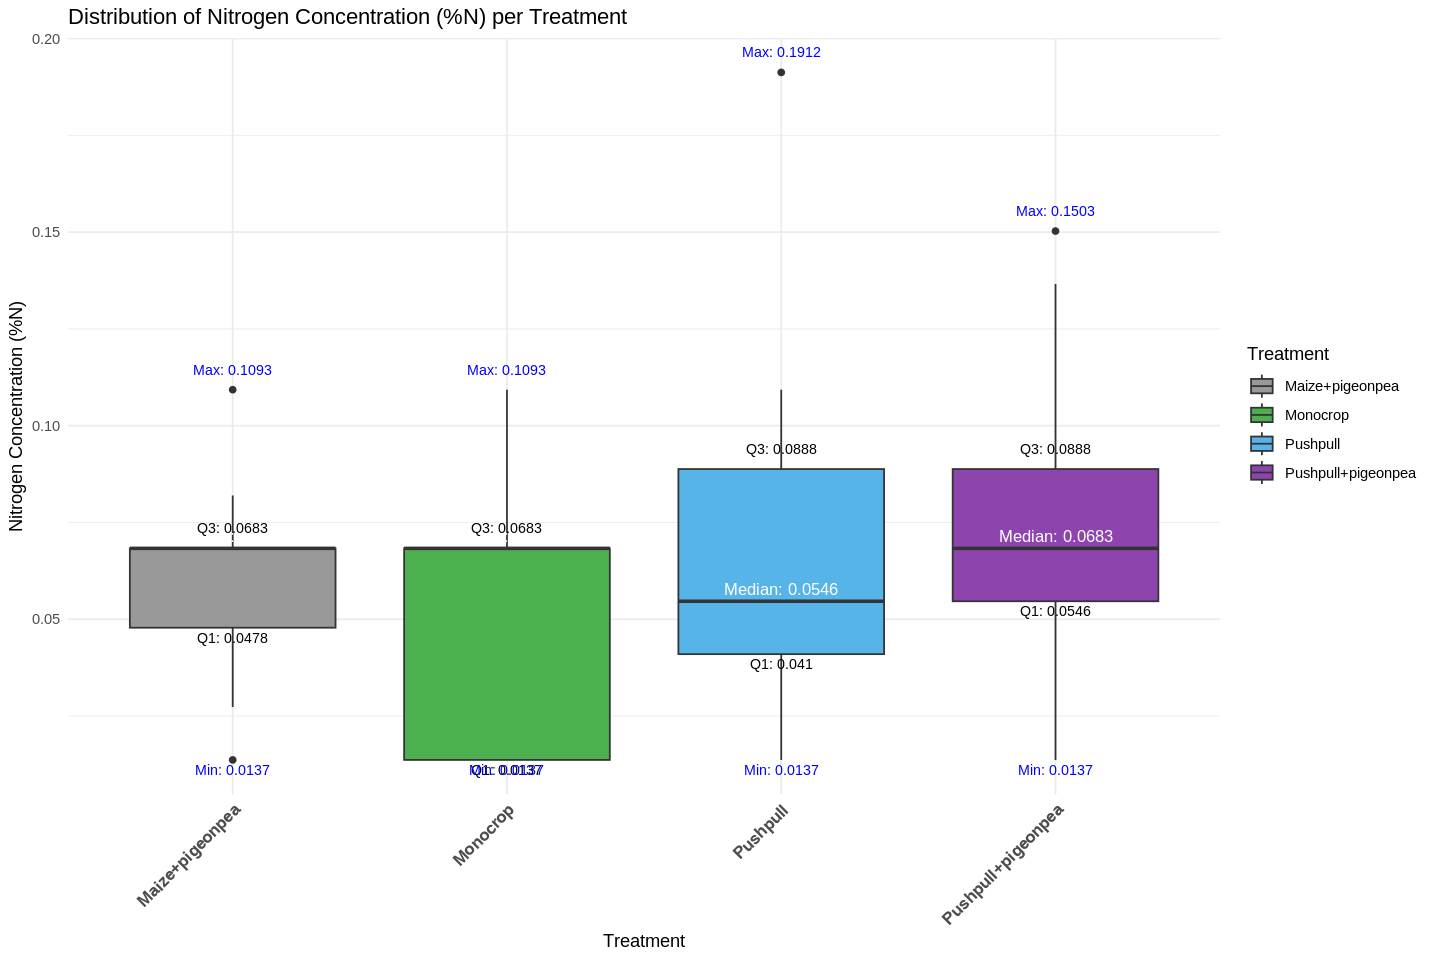

In [110]:
# Calculate box plot statistics for %N per Treatment
box_stats_N_treatment <- soil_data %>%
  group_by(Treatment) %>%
  summarise(
    Median = median(`%N`, na.rm = TRUE),
    Q1 = quantile(`%N`, 0.25, na.rm = TRUE),
    Q3 = quantile(`%N`, 0.75, na.rm = TRUE),
    Min = min(`%N`, na.rm = TRUE),
    Max = max(`%N`, na.rm = TRUE)
  )

# Create the boxplot and annotate calculated statistics
ggplot(soil_data, aes(x = Treatment, y = `%N`, fill = Treatment)) +
  geom_boxplot() +  # Boxplot to show distribution

  # Annotate box plot with statistics (Median, Q1, Q3, Min, Max)
  geom_text(data = box_stats_N_treatment, aes(label = paste0("Median: ", round(Median, 4)), y = Median),
            color = "white", vjust = -0.5, size = 3.5) +

  geom_text(data = box_stats_N_treatment, aes(label = paste0("Q1: ", round(Q1, 4)), y = Q1),
            color = "black", vjust = 1.5, size = 3) +

  geom_text(data = box_stats_N_treatment, aes(label = paste0("Q3: ", round(Q3, 4)), y = Q3),
            color = "black", vjust = -1.5, size = 3) +

  geom_text(data = box_stats_N_treatment, aes(label = paste0("Min: ", round(Min, 4)), y = Min),
            color = "blue", vjust = 1.5, size = 3) +

  geom_text(data = box_stats_N_treatment, aes(label = paste0("Max: ", round(Max, 4)), y = Max),
            color = "blue", vjust = -1.5, size = 3) +

  scale_fill_manual(values = c("#999999", "#4CAF50", "#56B4E9", "#8E44AD")) +
  labs(title = "Distribution of Nitrogen Concentration (%N) per Treatment",
       x = "Treatment",
       y = "Nitrogen Concentration (%N)") +

  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10, face = "bold"))

## Comparing average Potassium in relation to the different Treatments

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”


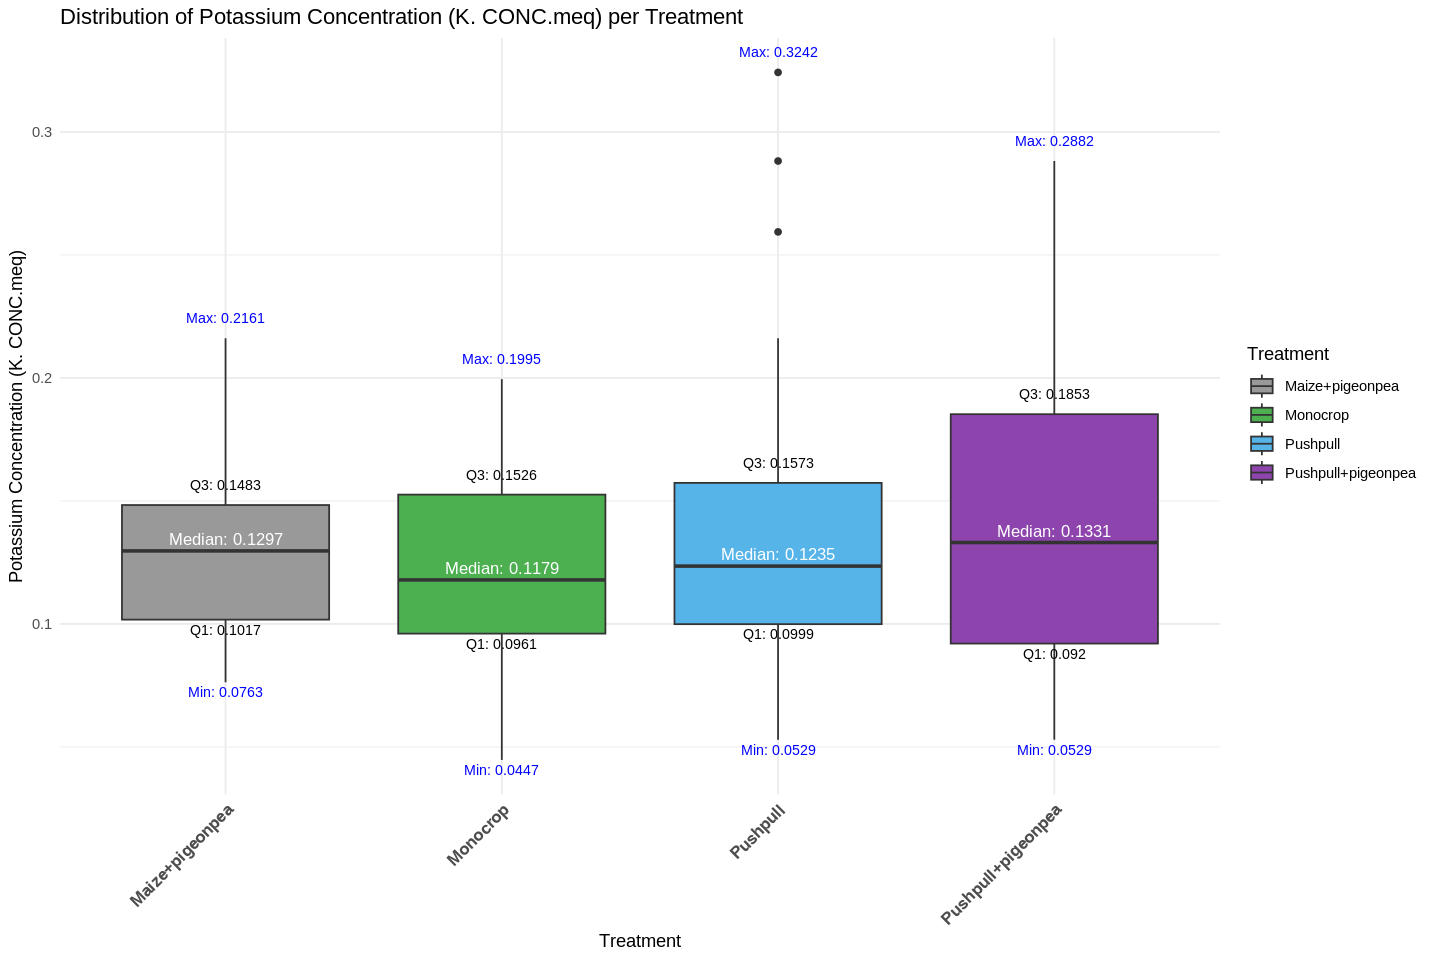

In [111]:
# Calculate box plot statistics for K. CONC.meq per Treatment
box_stats_K_treatment <- soil_data %>%
  group_by(Treatment) %>%
  summarise(
    Median = median(`K. CONC.meq`, na.rm = TRUE),
    Q1 = quantile(`K. CONC.meq`, 0.25, na.rm = TRUE),
    Q3 = quantile(`K. CONC.meq`, 0.75, na.rm = TRUE),
    Min = min(`K. CONC.meq`, na.rm = TRUE),
    Max = max(`K. CONC.meq`, na.rm = TRUE)
  )

# Create the boxplot and annotate calculated statistics
ggplot(soil_data, aes(x = Treatment, y = `K. CONC.meq`, fill = Treatment)) +
  geom_boxplot() +  # Boxplot to show distribution

  # Annotate box plot with statistics (Median, Q1, Q3, Min, Max)
  geom_text(data = box_stats_K_treatment, aes(label = paste0("Median: ", round(Median, 4)), y = Median),
            color = "white", vjust = -0.5, size = 3.5) +

  geom_text(data = box_stats_K_treatment, aes(label = paste0("Q1: ", round(Q1, 4)), y = Q1),
            color = "black", vjust = 1.5, size = 3) +

  geom_text(data = box_stats_K_treatment, aes(label = paste0("Q3: ", round(Q3, 4)), y = Q3),
            color = "black", vjust = -1.5, size = 3) +

  geom_text(data = box_stats_K_treatment, aes(label = paste0("Min: ", round(Min, 4)), y = Min),
            color = "blue", vjust = 1.5, size = 3) +

  geom_text(data = box_stats_K_treatment, aes(label = paste0("Max: ", round(Max, 4)), y = Max),
            color = "blue", vjust = -1.5, size = 3) +

  scale_fill_manual(values = c("#999999", "#4CAF50", "#56B4E9", "#8E44AD")) +
  labs(title = "Distribution of Potassium Concentration (K. CONC.meq) per Treatment",
       x = "Treatment",
       y = "Potassium Concentration (K. CONC.meq)") +

  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10, face = "bold"))

## Comparing average Phosphorus in relation to the different Treatments

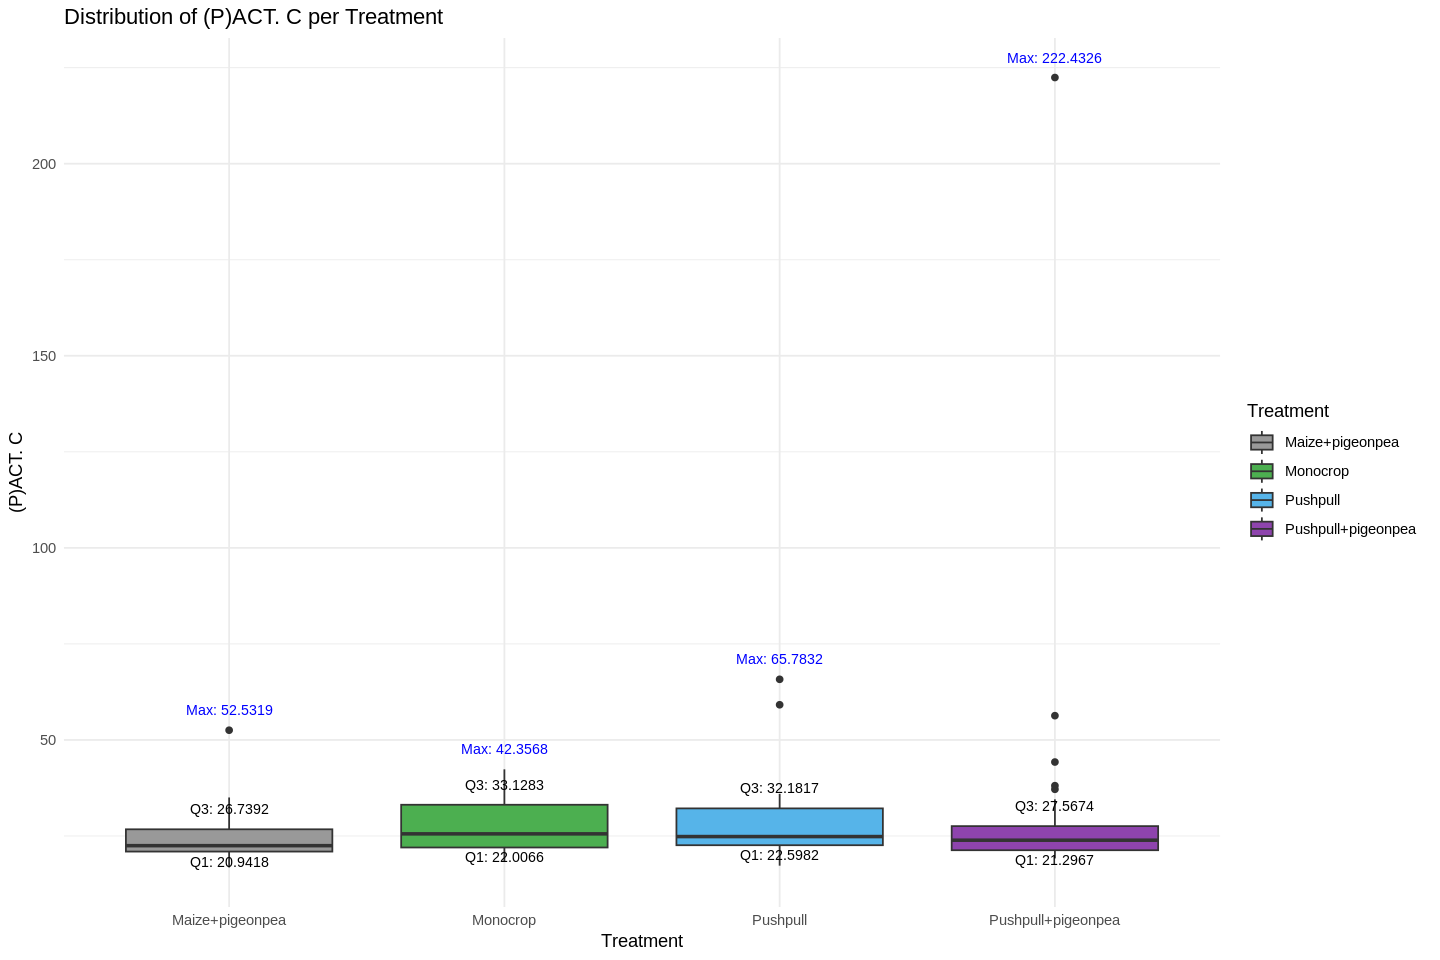

In [112]:
# Set larger figure size (specific to R Markdown or Notebook settings)
options(repr.plot.width = 12, repr.plot.height = 8)  # Width and height in inches

# Calculate box plot statistics for (P)ACT. C per Treatment
box_stats_P_ACT_treatment <- soil_data %>%
  group_by(Treatment) %>%
  summarise(
    Median = median(`(P)ACT. C`, na.rm = TRUE),
    Q1 = quantile(`(P)ACT. C`, 0.25, na.rm = TRUE),
    Q3 = quantile(`(P)ACT. C`, 0.75, na.rm = TRUE),
    Min = min(`(P)ACT. C`, na.rm = TRUE),
    Max = max(`(P)ACT. C`, na.rm = TRUE)
  )

# Create the boxplot and annotate calculated statistics
ggplot(soil_data, aes(x = Treatment, y = `(P)ACT. C`, fill = Treatment)) +
  geom_boxplot() +  # Boxplot to show distribution

  # Annotate box plot with statistics (Q1, Q3, Max)

  geom_text(data = box_stats_P_ACT_treatment, aes(label = paste0("Q1: ", round(Q1, 4)), y = Q1),
            color = "black", vjust = 1.5, size = 3) +

  geom_text(data = box_stats_P_ACT_treatment, aes(label = paste0("Q3: ", round(Q3, 4)), y = Q3),
            color = "black", vjust = -1.5, size = 3) +

  geom_text(data = box_stats_P_ACT_treatment, aes(label = paste0("Max: ", round(Max, 4)), y = Max),
            color = "blue", vjust = -1.5, size = 3) +


  scale_fill_manual(values = c("#999999", "#4CAF50", "#56B4E9", "#8E44AD")) +
  labs(title = "Distribution of (P)ACT. C per Treatment",
       x = "Treatment",
       y = "(P)ACT. C") +

  theme_minimal()

## Comparing average Calcium cocentration in relation to the different Treatments

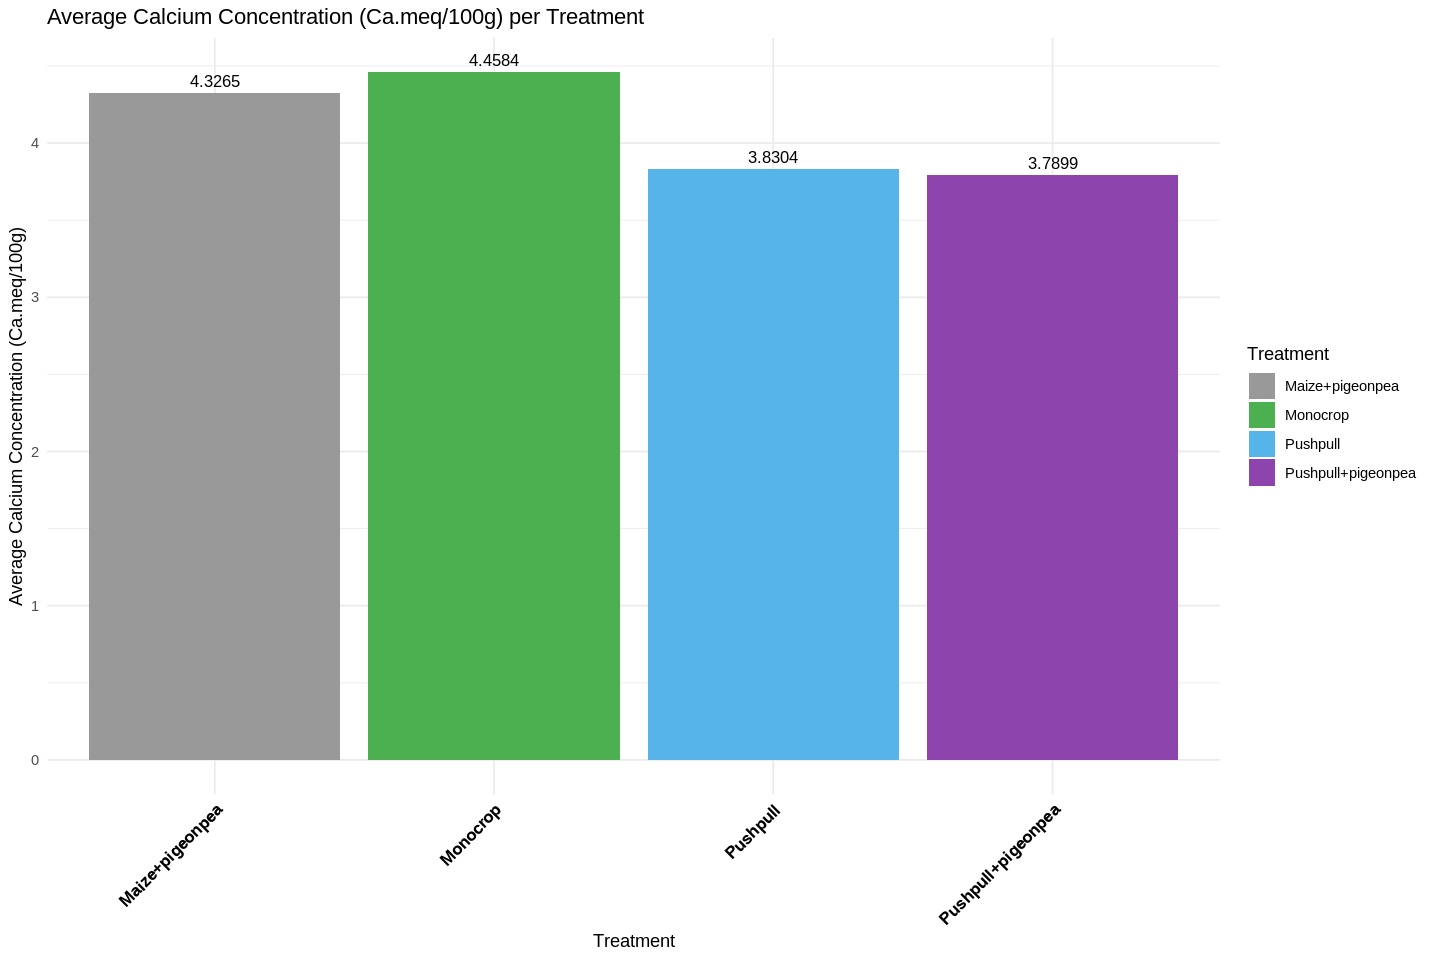

In [90]:
# Calculate mean Calcium concentration (Ca.meq/100g) per treatment
avg_Ca_treatment <- soil_data %>%
  group_by(Treatment) %>%
  summarise(mean_Ca = mean(`Ca.meq/100g`, na.rm = TRUE))

# Bar graph with mean Calcium concentration values and enhanced x-axis labels
ggplot(avg_Ca_treatment, aes(x = Treatment, y = mean_Ca, fill = Treatment)) +
  geom_bar(stat = "identity") +  # Create bar plot
  geom_text(aes(label = sprintf("%.4f", mean_Ca)),  # Display mean Calcium values with 4 decimal places
            vjust = -0.5, size = 3.5) +  # Position text above the bars
   scale_fill_manual(values = c("#999999", "#4CAF50", "#56B4E9", "#8E44AD")) +
   labs(title = "Average Calcium Concentration (Ca.meq/100g) per Treatment",
       x = "Treatment",
       y = "Average Calcium Concentration (Ca.meq/100g)") +
  theme_minimal() +
  theme(axis.text.x = element_text(color = "black", size = 10, face = "bold", angle = 45, hjust = 1))

## Comparing average Magnesium concentration in relation to the different Treatments

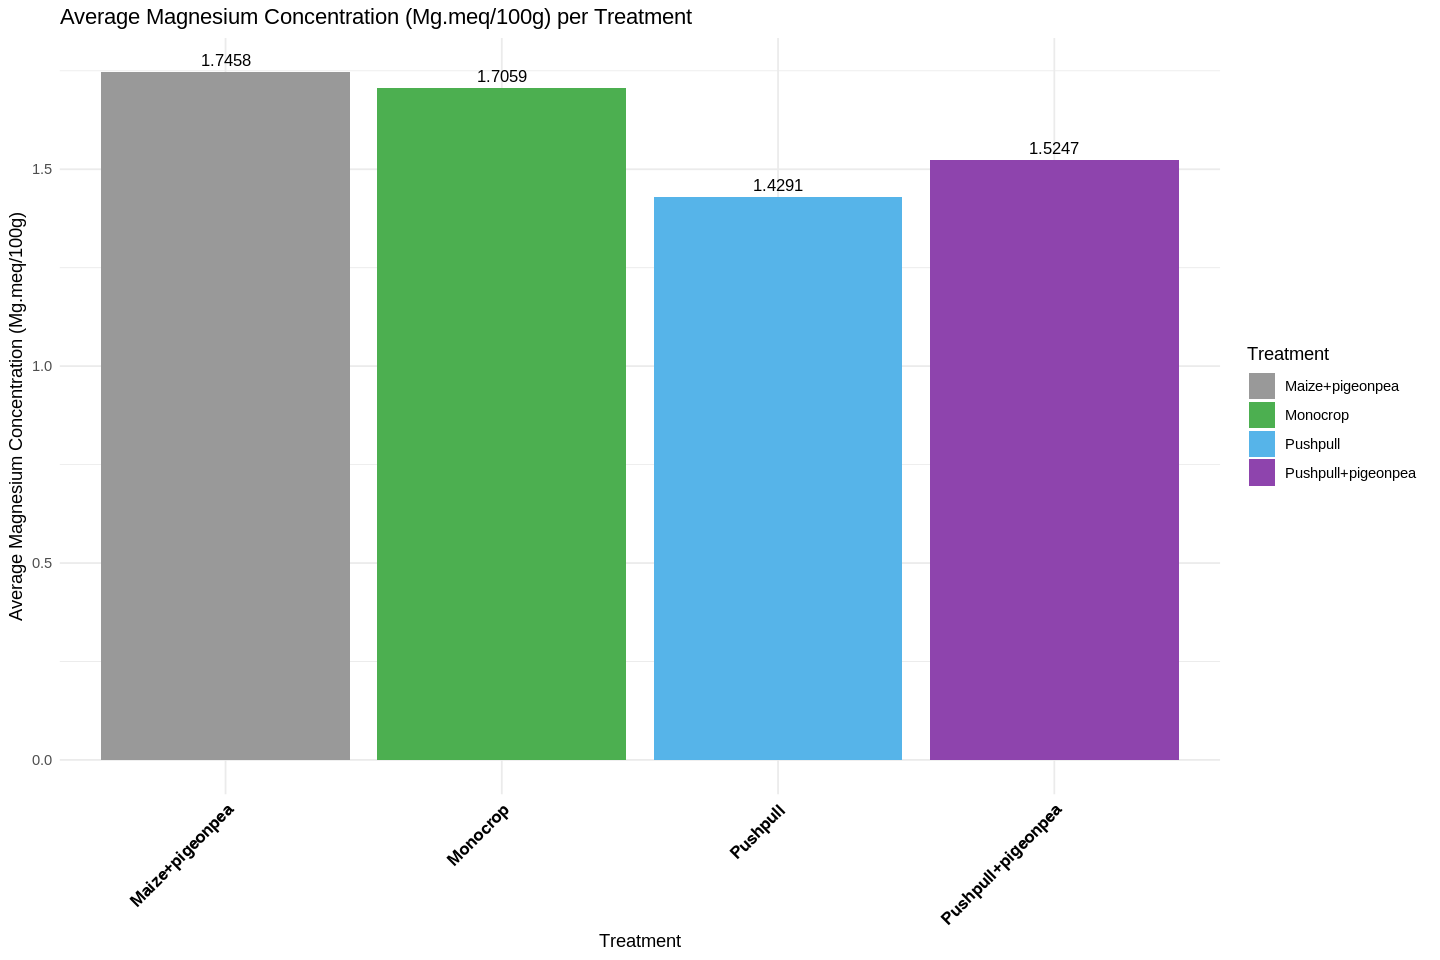

In [89]:
# Calculate mean Magnesium concentration (Mg.meq/100g) per treatment
avg_Mg_treatment <- soil_data %>%
  group_by(Treatment) %>%
  summarise(mean_Mg = mean(`Mg.meq/100g`, na.rm = TRUE))

# Bar graph with mean Magnesium concentration values and enhanced x-axis labels
ggplot(avg_Mg_treatment, aes(x = Treatment, y = mean_Mg, fill = Treatment)) +
  geom_bar(stat = "identity") +  # Create bar plot
  geom_text(aes(label = sprintf("%.4f", mean_Mg)),  # Display mean Magnesium values with 4 decimal places
            vjust = -0.5, size = 3.5) +  # Position text above the bars
   scale_fill_manual(values = c("#999999", "#4CAF50", "#56B4E9", "#8E44AD")) +
   labs(title = "Average Magnesium Concentration (Mg.meq/100g) per Treatment",
       x = "Treatment",
       y = "Average Magnesium Concentration (Mg.meq/100g)") +
  theme_minimal() +
  theme(axis.text.x = element_text(color = "black", size = 10, face = "bold", angle = 45, hjust = 1))

## Comparing average Iron concentration in relation to the different Treatments

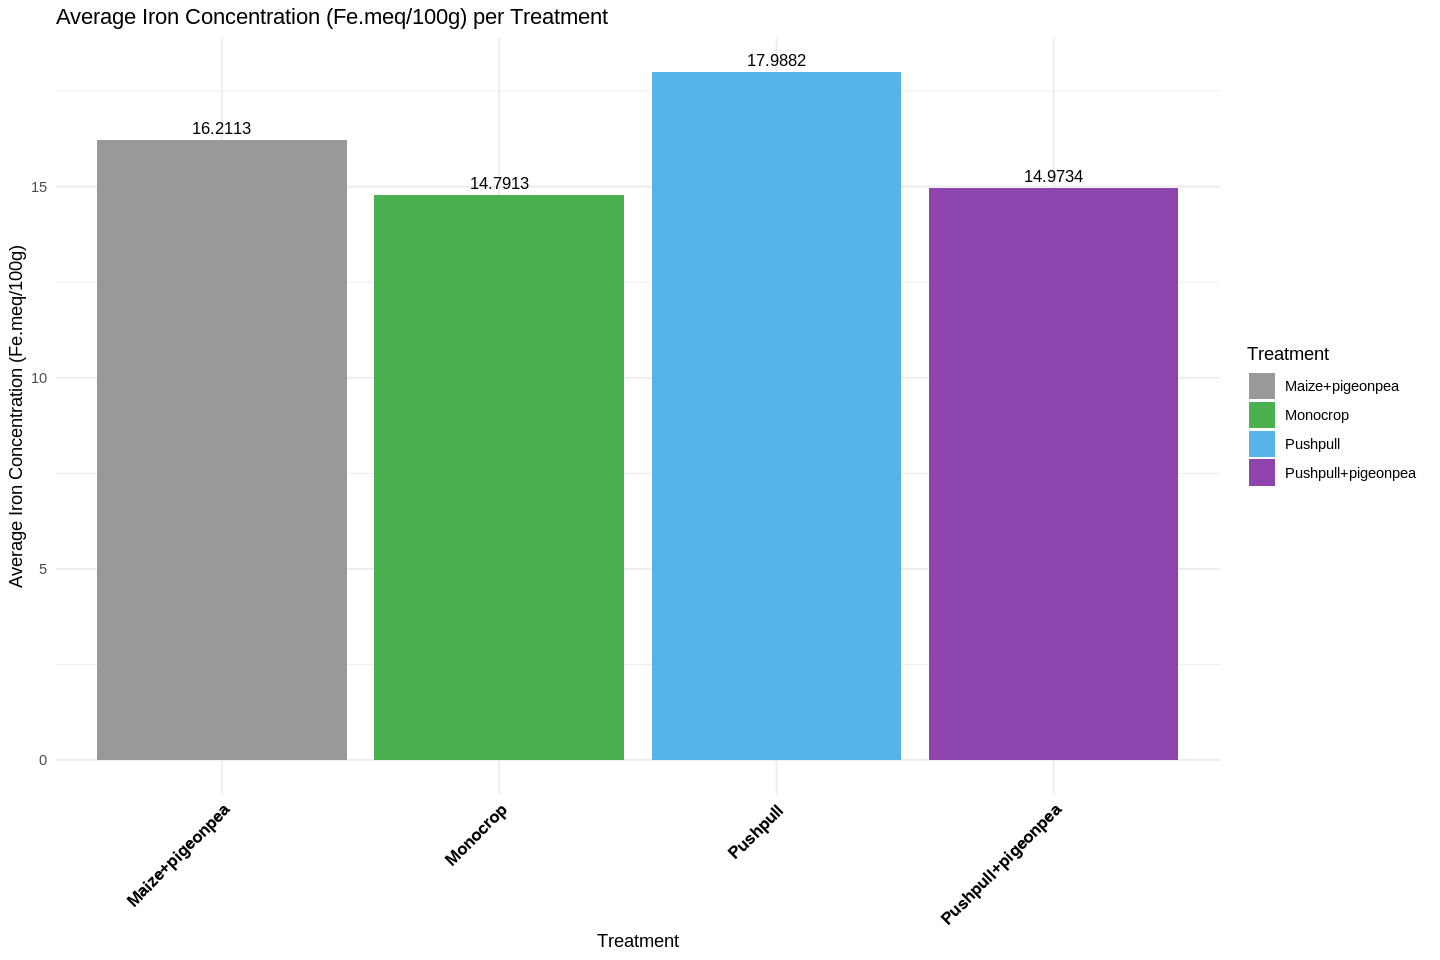

In [88]:
# Calculate mean Iron concentration (Fe.meq/100g) per treatment
avg_Fe_treatment <- soil_data %>%
  group_by(Treatment) %>%
  summarise(mean_Fe = mean(`Fe.meq/100g`, na.rm = TRUE))

# Bar graph with mean Iron concentration values and enhanced x-axis labels
ggplot(avg_Fe_treatment, aes(x = Treatment, y = mean_Fe, fill = Treatment)) +
  geom_bar(stat = "identity") +  # Create bar plot
  geom_text(aes(label = sprintf("%.4f", mean_Fe)),  # Display mean Iron values with 4 decimal places
            vjust = -0.5, size = 3.5) +  # Position text above the bars
  scale_fill_manual(values = c("#999999", "#4CAF50", "#56B4E9", "#8E44AD")) +
  labs(title = "Average Iron Concentration (Fe.meq/100g) per Treatment",
       x = "Treatment",
       y = "Average Iron Concentration (Fe.meq/100g)") +
  theme_minimal() +
  theme(axis.text.x = element_text(color = "black", size = 10, face = "bold", angle = 45, hjust = 1))

## Comparing average Zinc concentration in relation to the different Treatments

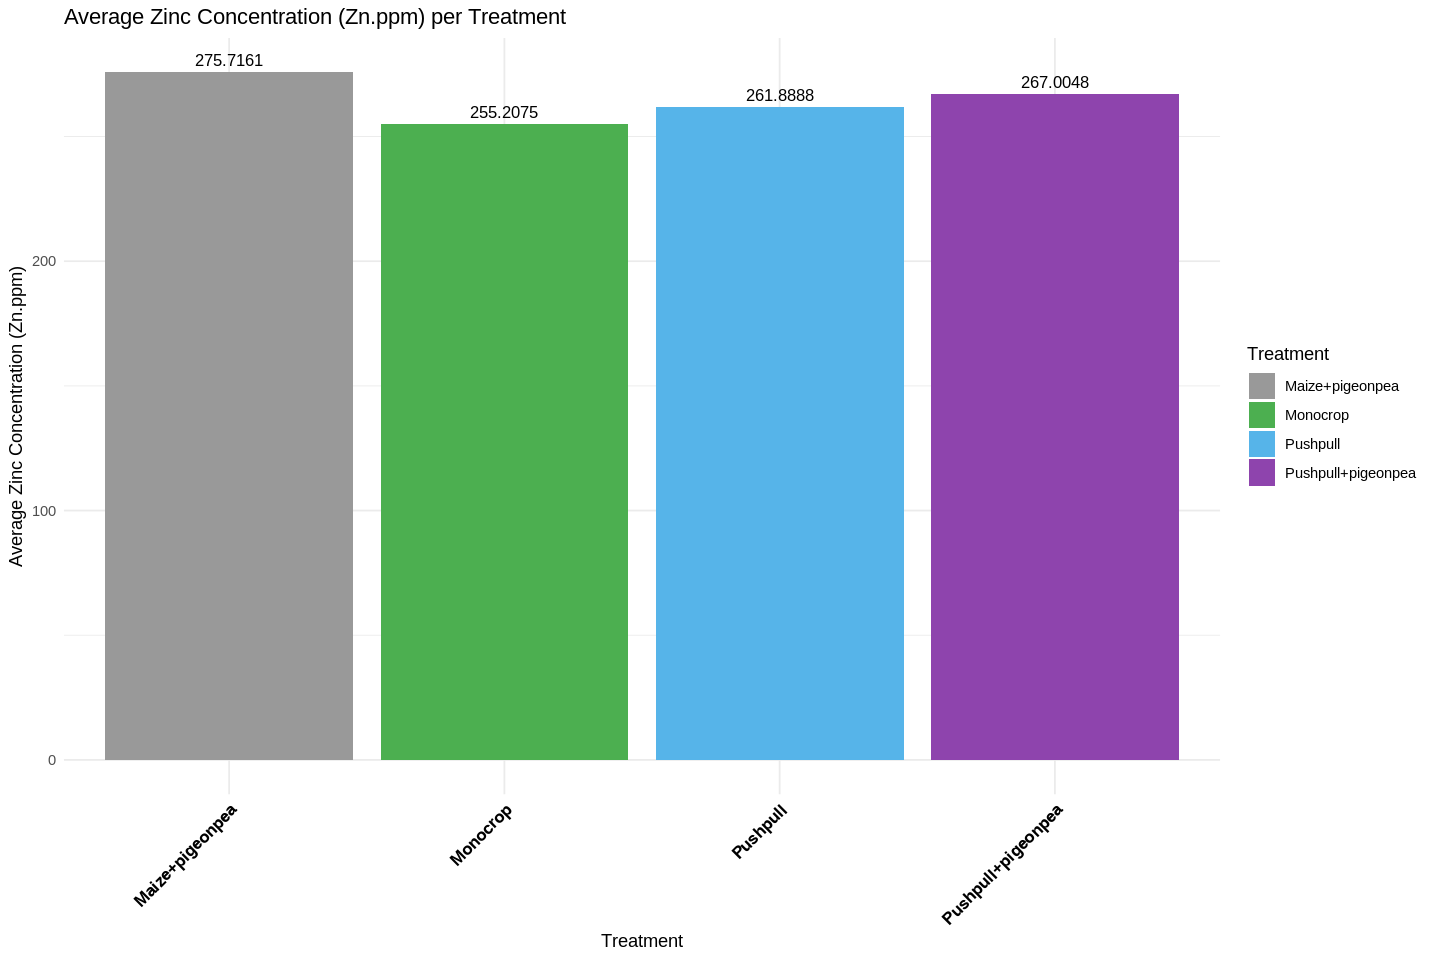

In [87]:
# Calculate mean Zinc concentration (Zn.ppm) per treatment
avg_Zn_treatment <- soil_data %>%
  group_by(Treatment) %>%
  summarise(mean_Zn = mean(`Zn.ppm`, na.rm = TRUE))

# Bar graph with custom fill colors
ggplot(avg_Zn_treatment, aes(x = Treatment, y = mean_Zn, fill = Treatment)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = sprintf("%.4f", mean_Zn)),
            vjust = -0.5, size = 3.5) +
  scale_fill_manual(values = c("#999999", "#4CAF50", "#56B4E9", "#8E44AD")) +
  labs(title = "Average Zinc Concentration (Zn.ppm) per Treatment",
       x = "Treatment",
       y = "Average Zinc Concentration (Zn.ppm)") +
  theme_minimal() +
  theme(axis.text.x = element_text(color = "black", size = 10, face = "bold", angle = 45, hjust = 1))

## Getting Significance

In [37]:
se_table <- soil_data %>%
  group_by(Treatment, County) %>%
  summarise(
    se_pH = sd(pH, na.rm = TRUE) / sqrt(n()),
    se_EC = sd(EC, na.rm = TRUE) / sqrt(n()),
    se_SOC = sd(SOC, na.rm = TRUE) / sqrt(n()),
    se_percent_SOC = sd(`%SOC`, na.rm = TRUE) / sqrt(n()),
    se_P = sd(`(P)ACT. C`, na.rm = TRUE) / sqrt(n()),
    se_K = sd(`K. CONC.meq`, na.rm = TRUE) / sqrt(n()),
    se_percent_N = sd(`%N`, na.rm = TRUE) / sqrt(n()),
    se_Ca = sd(`Ca.meq/100g`, na.rm = TRUE) / sqrt(n()),
    se_Mg = sd(`Mg.meq/100g`, na.rm = TRUE) / sqrt(n()),
    se_Fe = sd(`Fe.meq/100g`, na.rm = TRUE) / sqrt(n()),
    se_Zn = sd(`Zn.ppm`, na.rm = TRUE) / sqrt(n()),
    .groups = 'drop'
  )

Considering both the mean and standard devation

In [38]:
combined_summary <- left_join(soil_summary, se_table, by = c("Treatment", "County"))

###%SOC

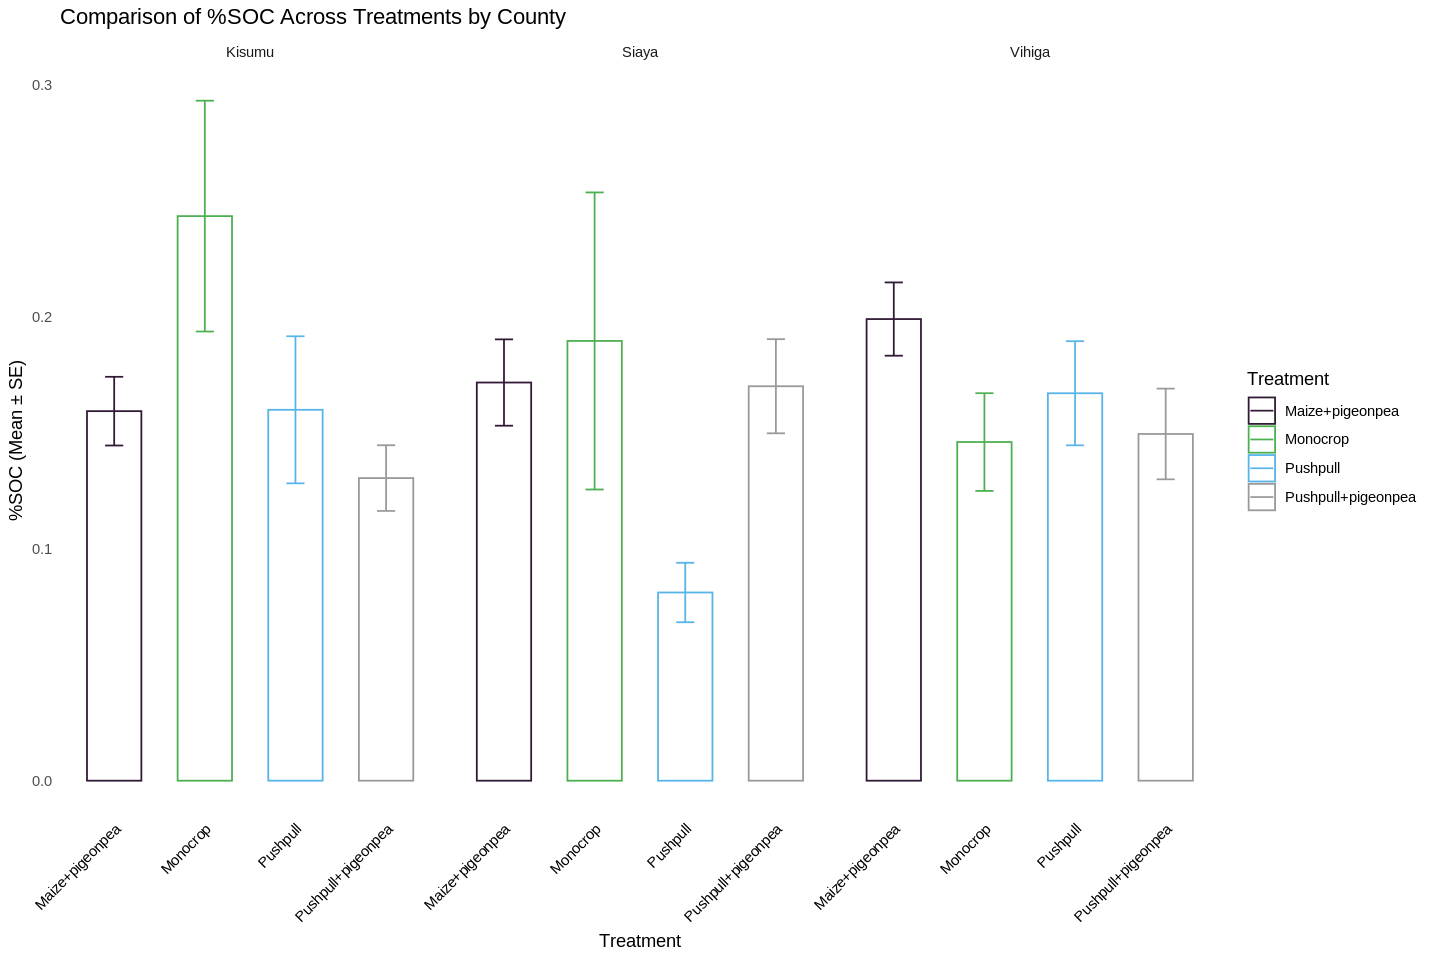

In [65]:
ggplot(combined_summary, aes(x = Treatment, y = mean_percent_SOC, color = Treatment)) +
  geom_bar(stat = "identity", fill = "white", position = position_dodge(width = 0.7), width = 0.6) +
  geom_errorbar(
    aes(ymin = mean_percent_SOC - se_percent_SOC, ymax = mean_percent_SOC + se_percent_SOC),
    width = 0.2,
    position = position_dodge(width = 0.7)
  ) +
  facet_wrap(~ County) +
  scale_color_manual(values = c("#301934", "#4CAF50", "#56B4E9", "#999999")) +
  theme_minimal() +
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, color = "black")
  ) +
  labs(
    y = "%SOC (Mean ± SE)",
    x = "Treatment",
    title = "Comparison of %SOC Across Treatments by County"
  )

###pH

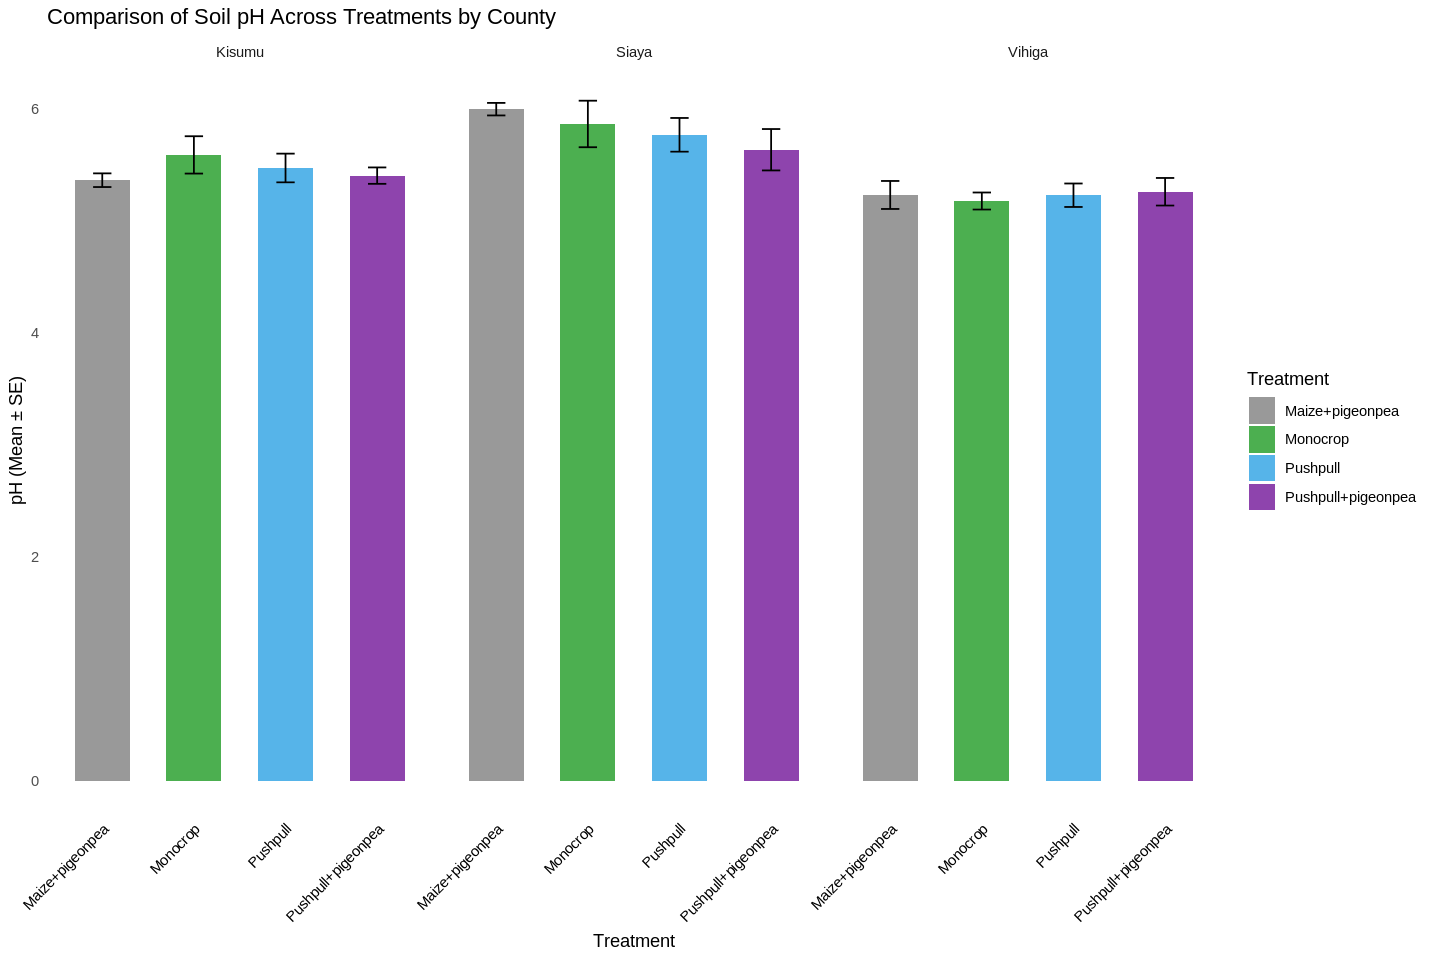

In [54]:
ggplot(combined_summary, aes(x = Treatment, y = mean_pH, fill = Treatment)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7), width = 0.6) +
  geom_errorbar(
    aes(ymin = mean_pH - se_pH, ymax = mean_pH + se_pH),
    width = 0.2,
    position = position_dodge(width = 0.7)
  ) +
  facet_wrap(~ County) +
  scale_fill_manual(values = c("#999999", "#4CAF50", "#56B4E9", "#8E44AD" )) +
  theme_minimal() +
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, color = "black")
  ) +
  labs(
    y = "pH (Mean ± SE)",
    x = "Treatment",
    title = "Comparison of Soil pH Across Treatments by County"
  )

###EC

In [71]:
install.packages("remotes")
remotes::install_github("coolbutuseless/ggpattern")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




s2          (NA -> 1.1.7 ) [CRAN]
sf          (NA -> 1.0-20) [CRAN]
gridpattern (NA -> 1.3.1 ) [CRAN]


Installing 3 packages: s2, sf, gridpattern

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpo6AXkB/remotes110724a6443/trevorld-ggpattern-611e3d2/DESCRIPTION’ ... OK
* preparing ‘ggpattern’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘ggpattern_1.1.4.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [73]:
library(ggpattern)

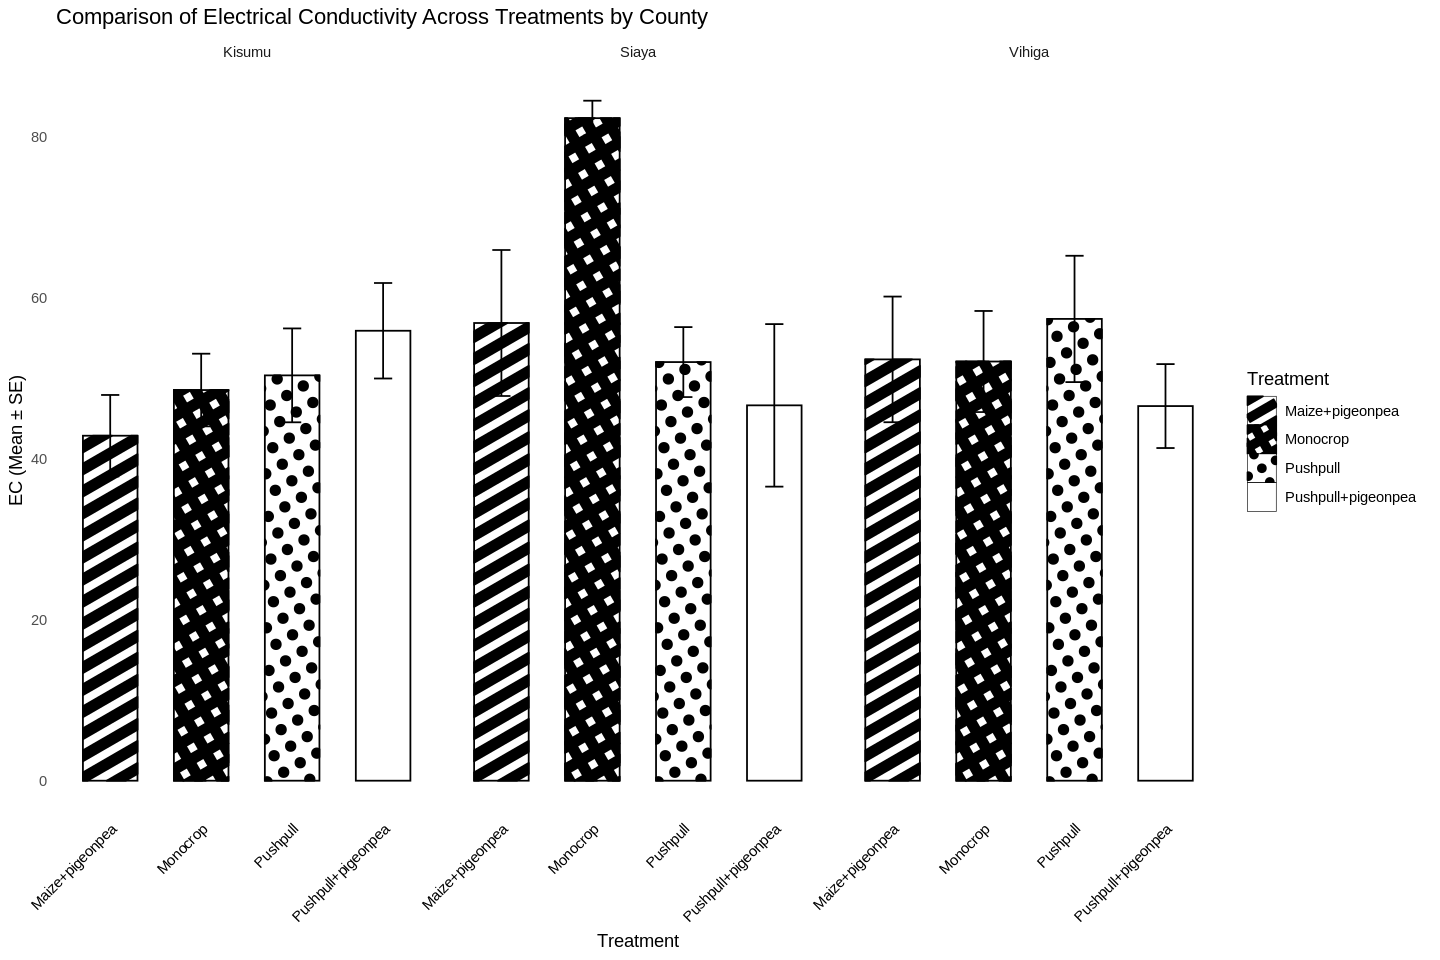

In [74]:
ggplot(combined_summary, aes(x = Treatment, y = mean_EC, pattern = Treatment)) +
  geom_bar_pattern(
    stat = "identity",
    position = position_dodge(width = 0.7),
    width = 0.6,
    fill = "white",
    color = "black",
    pattern_fill = "black",
    pattern_colour = "black",
    pattern_density = 0.5,
    pattern_spacing = 0.05,
    pattern_key_scale_factor = 0.6
  ) +
  geom_errorbar(
    aes(ymin = mean_EC - se_EC, ymax = mean_EC + se_EC),
    width = 0.2,
    position = position_dodge(width = 0.7)
  ) +
  facet_wrap(~ County) +
  scale_pattern_manual(values = c("stripe", "crosshatch", "circle", "none")) +
  theme_minimal() +
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, color = "black")
  ) +
  labs(
    y = "EC (Mean ± SE)",
    x = "Treatment",
    title = "Comparison of Electrical Conductivity Across Treatments by County"
  )

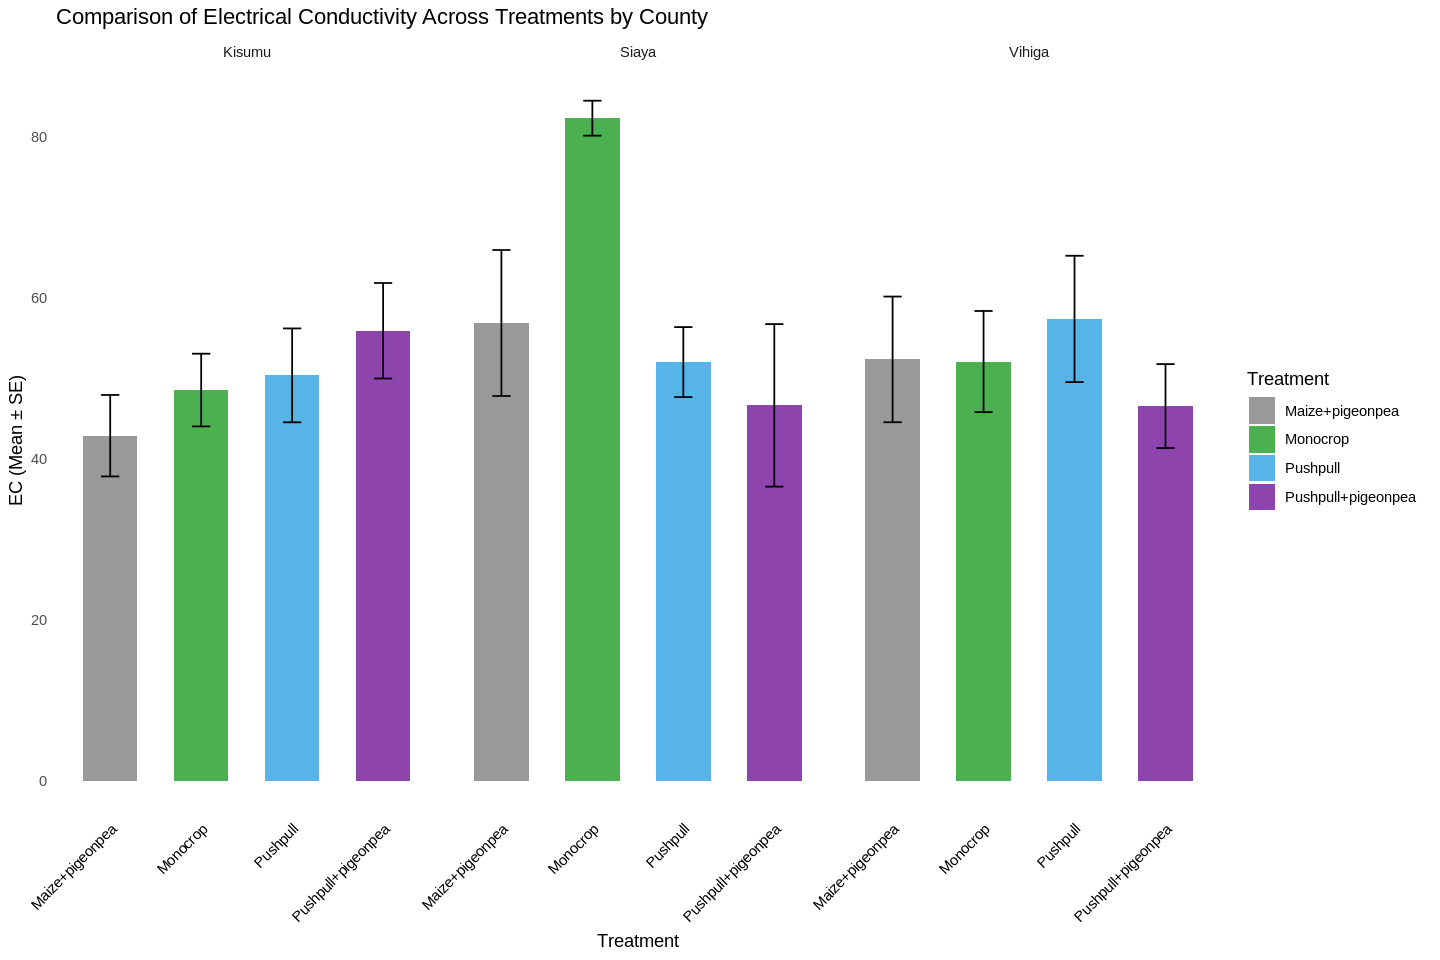

In [55]:
ggplot(combined_summary, aes(x = Treatment, y = mean_EC, fill = Treatment)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7), width = 0.6) +
  geom_errorbar(
    aes(ymin = mean_EC - se_EC, ymax = mean_EC + se_EC),
    width = 0.2,
    position = position_dodge(width = 0.7)
  ) +
  facet_wrap(~ County) +
  scale_fill_manual(values = c("#999999", "#4CAF50", "#56B4E9", "#8E44AD" )) +
  theme_minimal() +
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, color = "black")
  ) +
  labs(
    y = "EC (Mean ± SE)",
    x = "Treatment",
    title = "Comparison of Electrical Conductivity Across Treatments by County"
  )

###%N

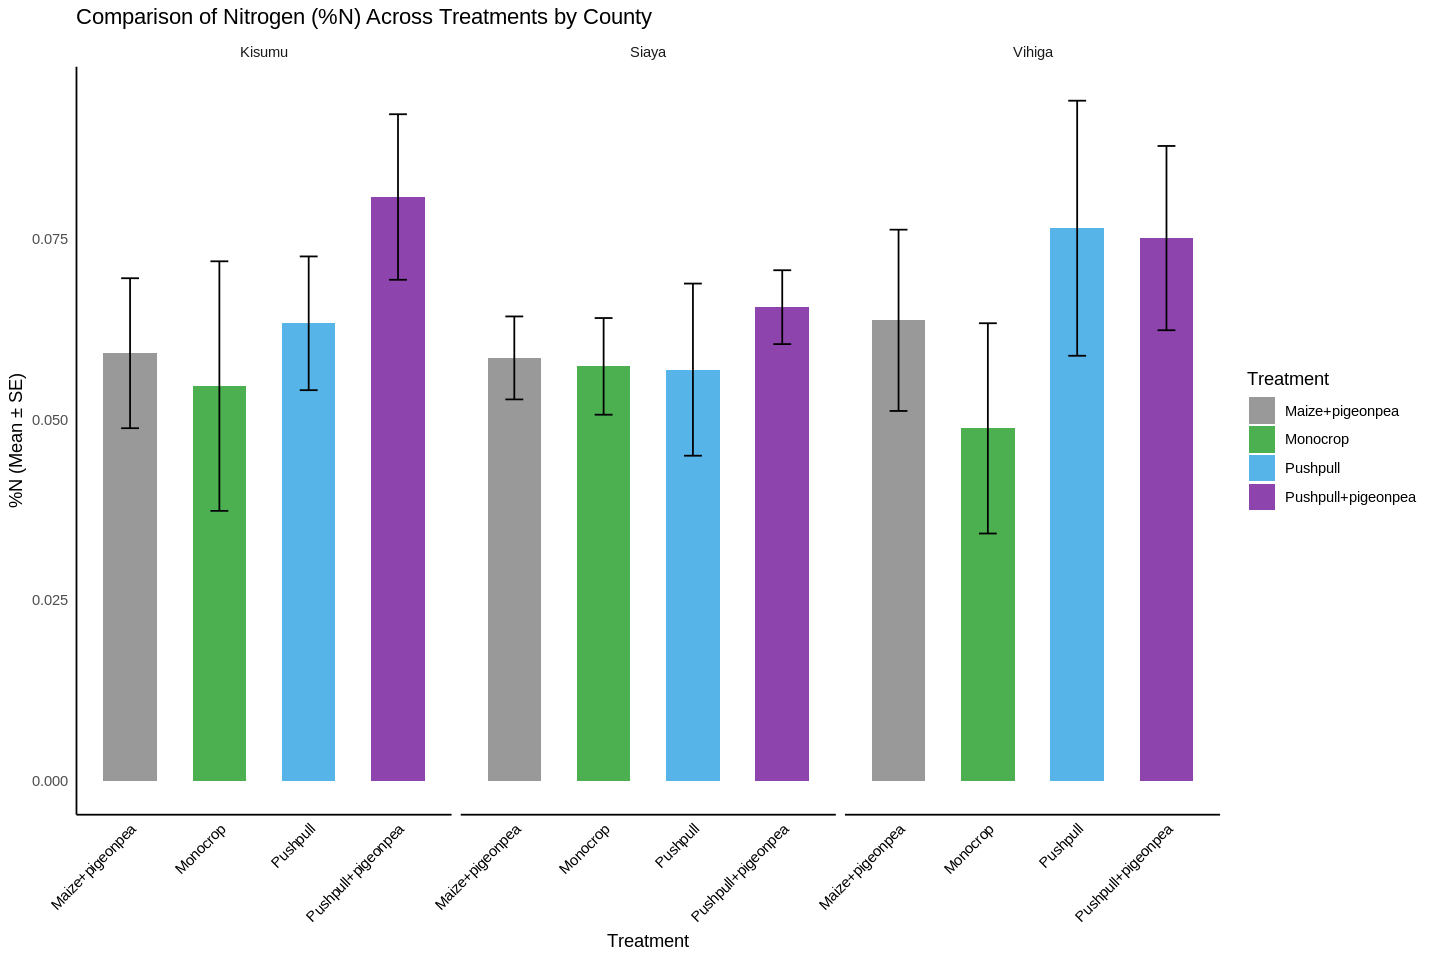

In [77]:
ggplot(combined_summary, aes(x = Treatment, y = mean_percent_N, fill = Treatment)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7), width = 0.6) +
  geom_errorbar(
    aes(ymin = mean_percent_N - se_percent_N, ymax = mean_percent_N + se_percent_N),
    width = 0.2,
    position = position_dodge(width = 0.7)
  ) +
  facet_wrap(~ County) +
  scale_fill_manual(values = c("#999999", "#4CAF50", "#56B4E9", "#8E44AD" )) +
  theme_minimal() +
  theme(
    panel.grid = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"),
    axis.text.x = element_text(angle = 45, hjust = 1, color = "black")
  ) +
  labs(
    y = "%N (Mean ± SE)",
    x = "Treatment",
    title = "Comparison of Nitrogen (%N) Across Treatments by County"
  )

###P

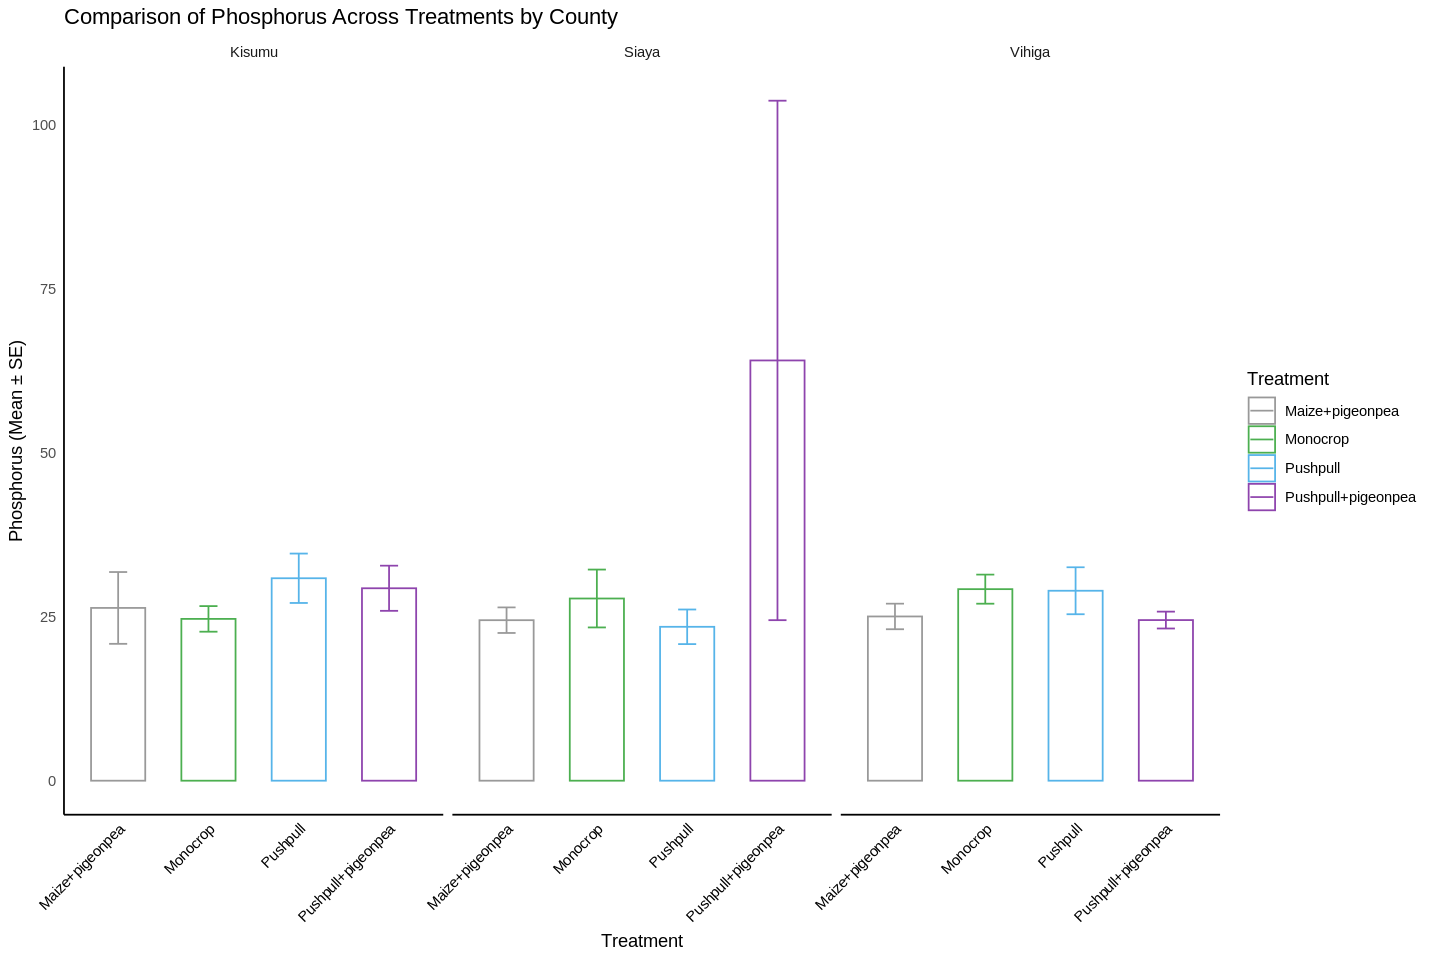

In [84]:
ggplot(combined_summary, aes(x = Treatment, y = mean_P, color = Treatment)) +
  geom_bar(stat = "identity", fill="white", position = position_dodge(width = 0.7), width = 0.6) +
  geom_errorbar(
    aes(ymin = mean_P - se_P, ymax = mean_P + se_P),
    width = 0.2,
    position = position_dodge(width = 0.7)
  ) +
  facet_wrap(~ County) +
  scale_color_manual(values = c("#999999", "#4CAF50", "#56B4E9", "#8E44AD" )) +
  theme_minimal() +
  theme(
    panel.grid = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"),
    axis.text.x = element_text(angle = 45, hjust = 1, color = "black")
  ) +
  labs(
    y = "Phosphorus (Mean ± SE)",
    x = "Treatment",
    title = "Comparison of Phosphorus Across Treatments by County"
  )

###K

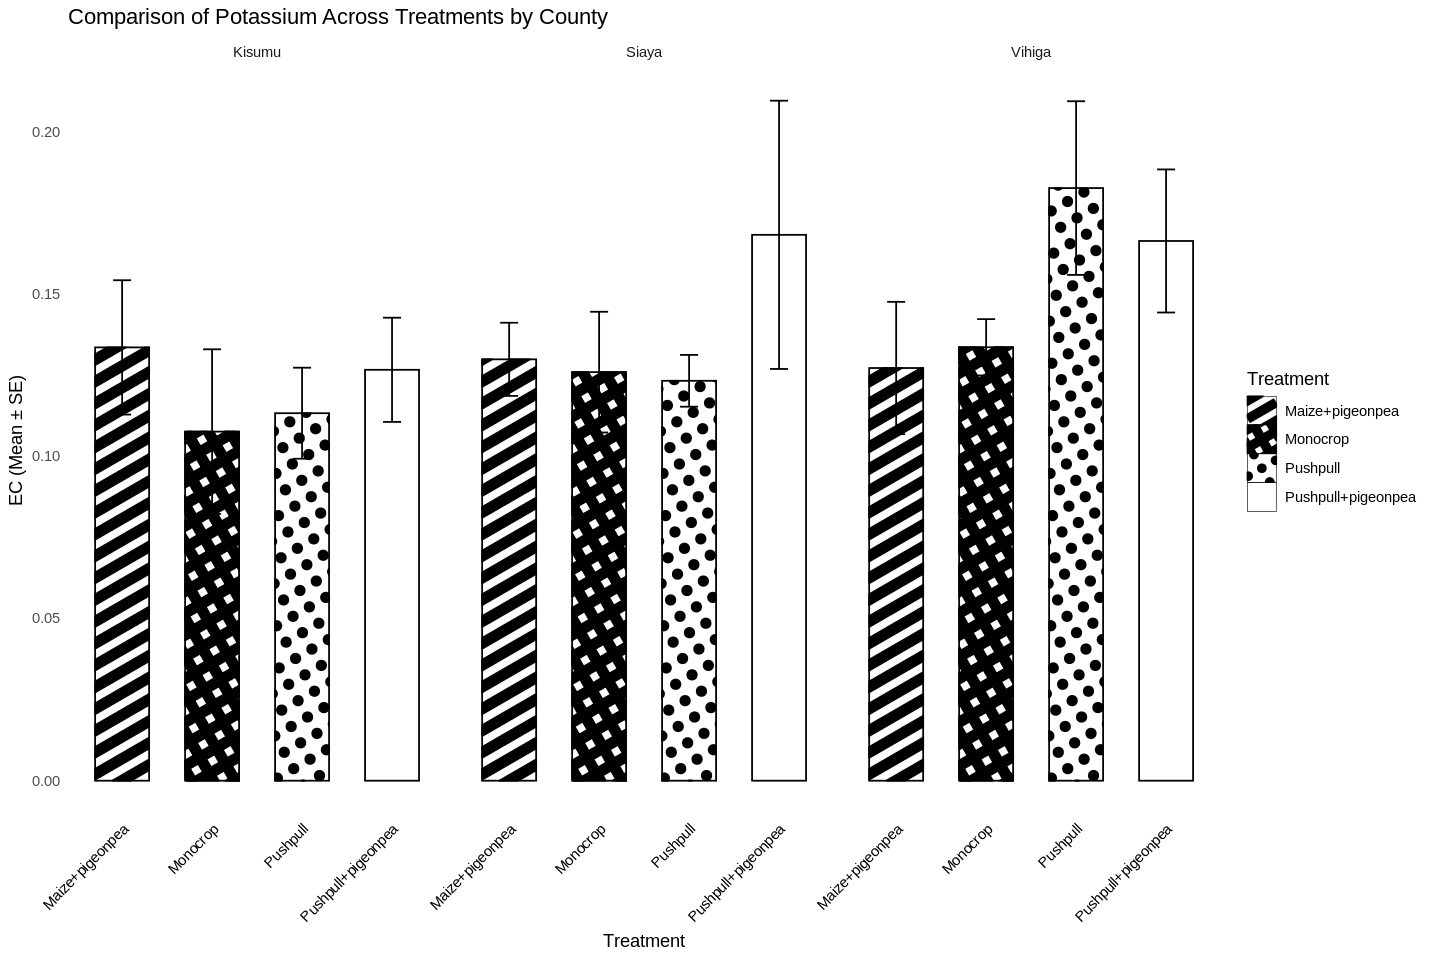

In [80]:
ggplot(combined_summary, aes(x = Treatment, y = mean_K, pattern = Treatment)) +
  geom_bar_pattern(
    stat = "identity",
    position = position_dodge(width = 0.7),
    width = 0.6,
    fill = "white",
    color = "black",
    pattern_fill = "black",
    pattern_colour = "black",
    pattern_density = 0.5,
    pattern_spacing = 0.05,
    pattern_key_scale_factor = 0.6
  ) +
  geom_errorbar(
    aes(ymin = mean_K - se_K, ymax = mean_K + se_K),
    width = 0.2,
    position = position_dodge(width = 0.7)
  ) +
  facet_wrap(~ County) +
  scale_pattern_manual(values = c("stripe", "crosshatch", "circle", "none")) +
  theme_minimal() +
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, color = "black")
  ) +
  labs(
    y = "EC (Mean ± SE)",
    x = "Treatment",
    title = "Comparison of Potassium Across Treatments by County"
  )

###Ca

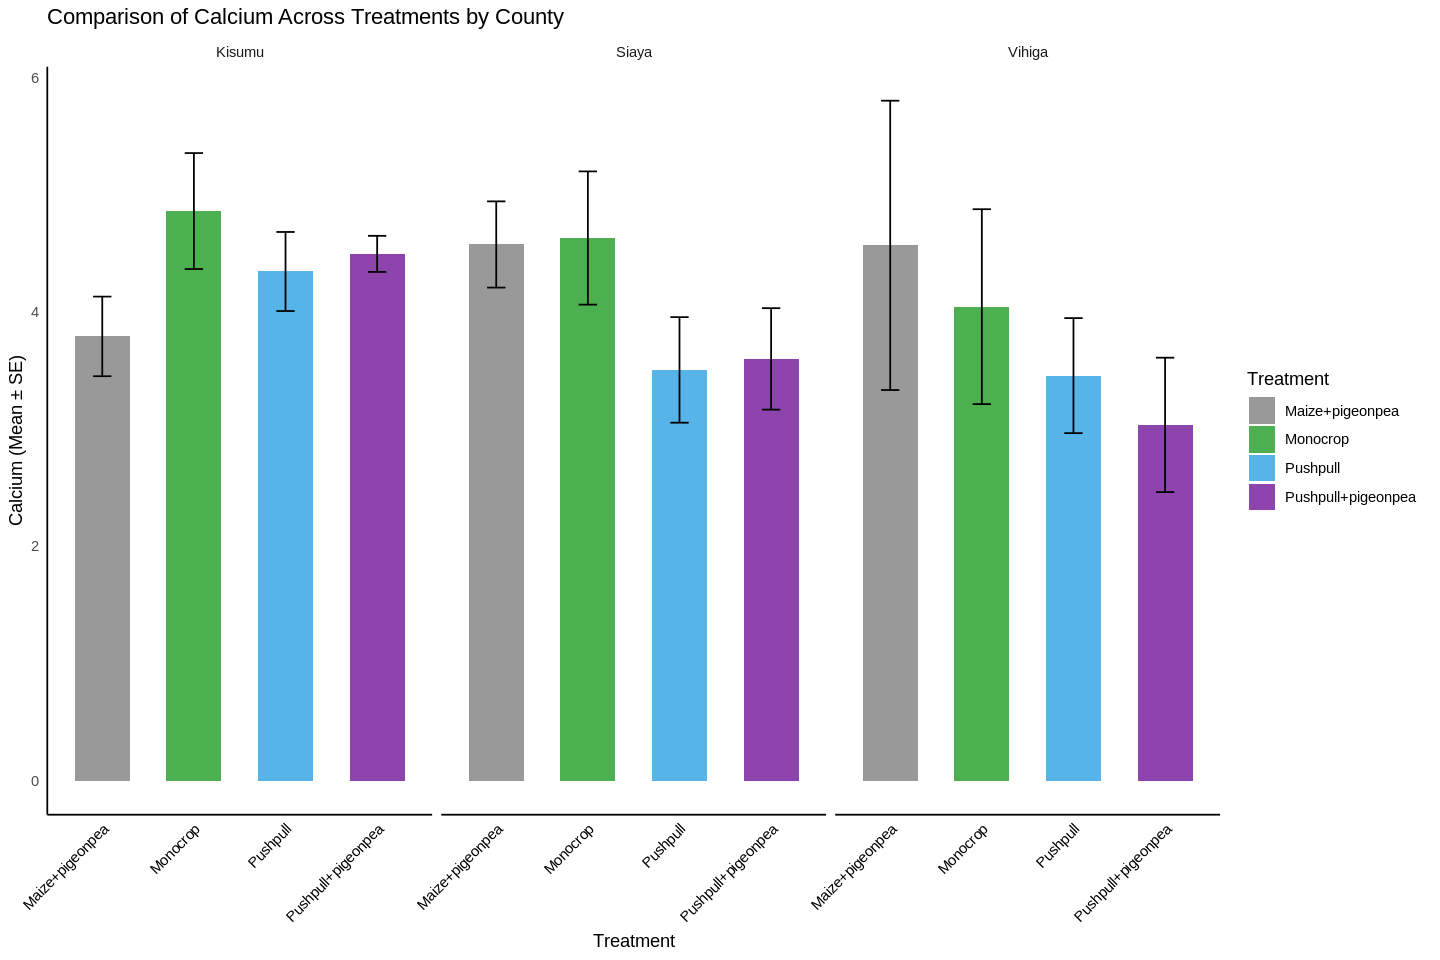

In [60]:
ggplot(combined_summary, aes(x = Treatment, y = mean_Ca, fill = Treatment)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7), width = 0.6) +
  geom_errorbar(
    aes(ymin = mean_Ca - se_Ca, ymax = mean_Ca + se_Ca),
    width = 0.2,
    position = position_dodge(width = 0.7)
  ) +
  facet_wrap(~ County) +
  scale_fill_manual(values = c("#999999", "#4CAF50", "#56B4E9", "#8E44AD" )) +
  theme_minimal() +
  theme(
    panel.grid = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"),
    axis.text.x = element_text(angle = 45, hjust = 1, color = "black")
  ) +
  labs(
    y = "Calcium (Mean ± SE)",
    x = "Treatment",
    title = "Comparison of Calcium Across Treatments by County"
  )

###Mg

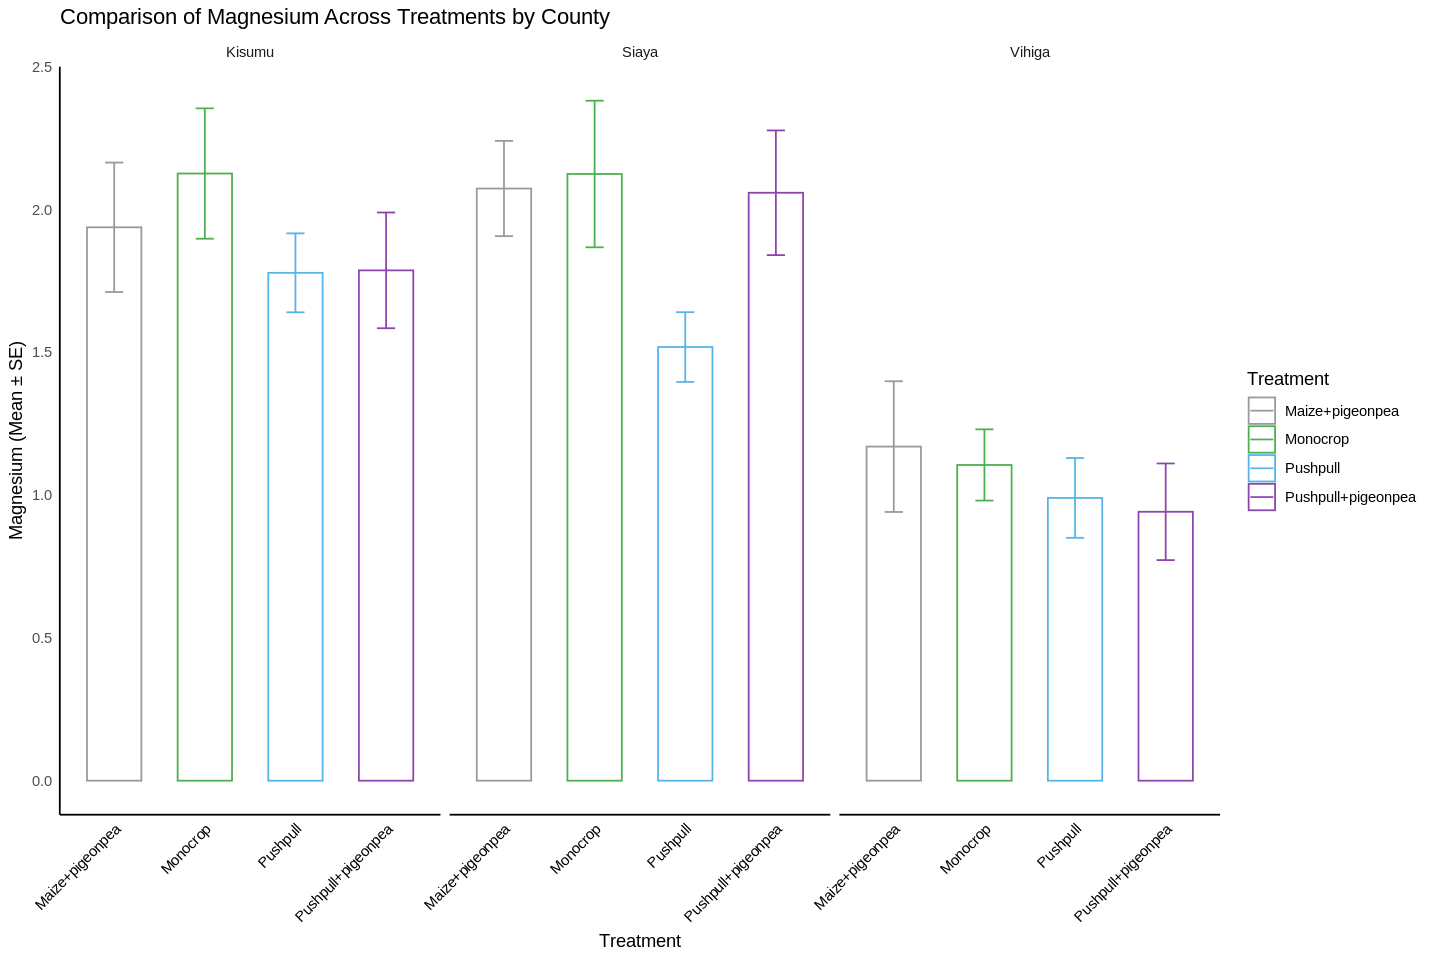

In [85]:
ggplot(combined_summary, aes(x = Treatment, y = mean_Mg, color = Treatment)) +
  geom_bar(stat = "identity", fill="white", position = position_dodge(width = 0.7), width = 0.6) +
  geom_errorbar(
    aes(ymin = mean_Mg - se_Mg, ymax = mean_Mg + se_Mg),
    width = 0.2,
    position = position_dodge(width = 0.7)
  ) +
  facet_wrap(~ County) +
  scale_color_manual(values = c("#999999", "#4CAF50", "#56B4E9", "#8E44AD" )) +
  theme_minimal() +
  theme(
    panel.grid = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"),
    axis.text.x = element_text(angle = 45, hjust = 1, color = "black")
  ) +
  labs(
    y = "Magnesium (Mean ± SE)",
    x = "Treatment",
    title = "Comparison of Magnesium Across Treatments by County"
  )

###Fe

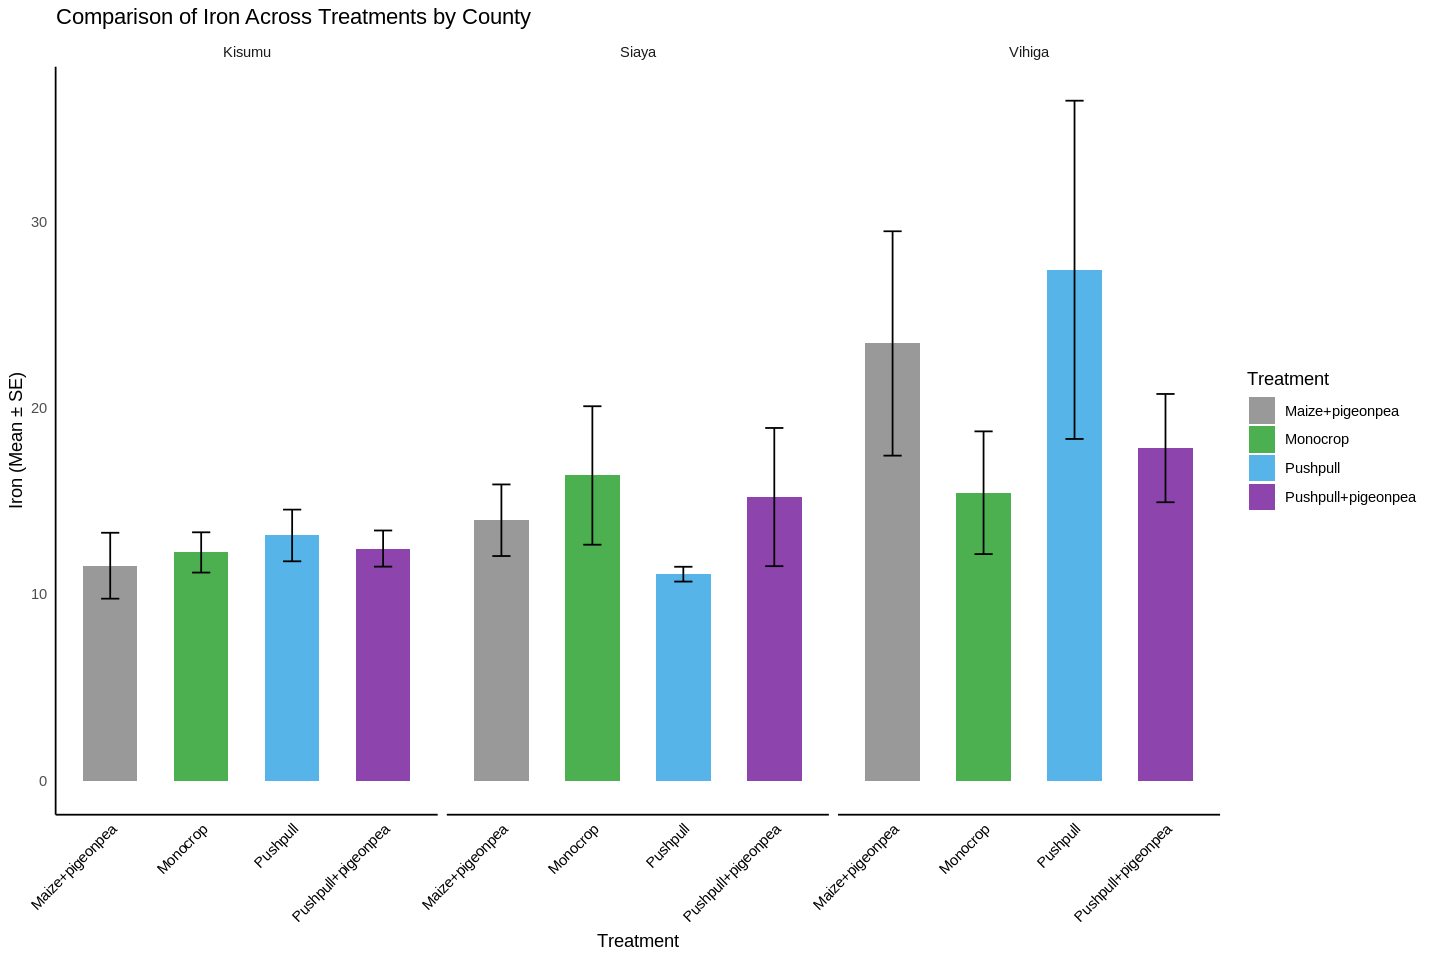

In [62]:
ggplot(combined_summary, aes(x = Treatment, y = mean_Fe, fill = Treatment)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7), width = 0.6) +
  geom_errorbar(
    aes(ymin = mean_Fe - se_Fe, ymax = mean_Fe + se_Fe),
    width = 0.2,
    position = position_dodge(width = 0.7)
  ) +
  facet_wrap(~ County) +
  scale_fill_manual(values = c("#999999", "#4CAF50", "#56B4E9", "#8E44AD" )) +
  theme_minimal() +
  theme(
    panel.grid = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"),
    axis.text.x = element_text(angle = 45, hjust = 1, color = "black")
  ) +
  labs(
    y = "Iron (Mean ± SE)",
    x = "Treatment",
    title = "Comparison of Iron Across Treatments by County"
  )

###Zn

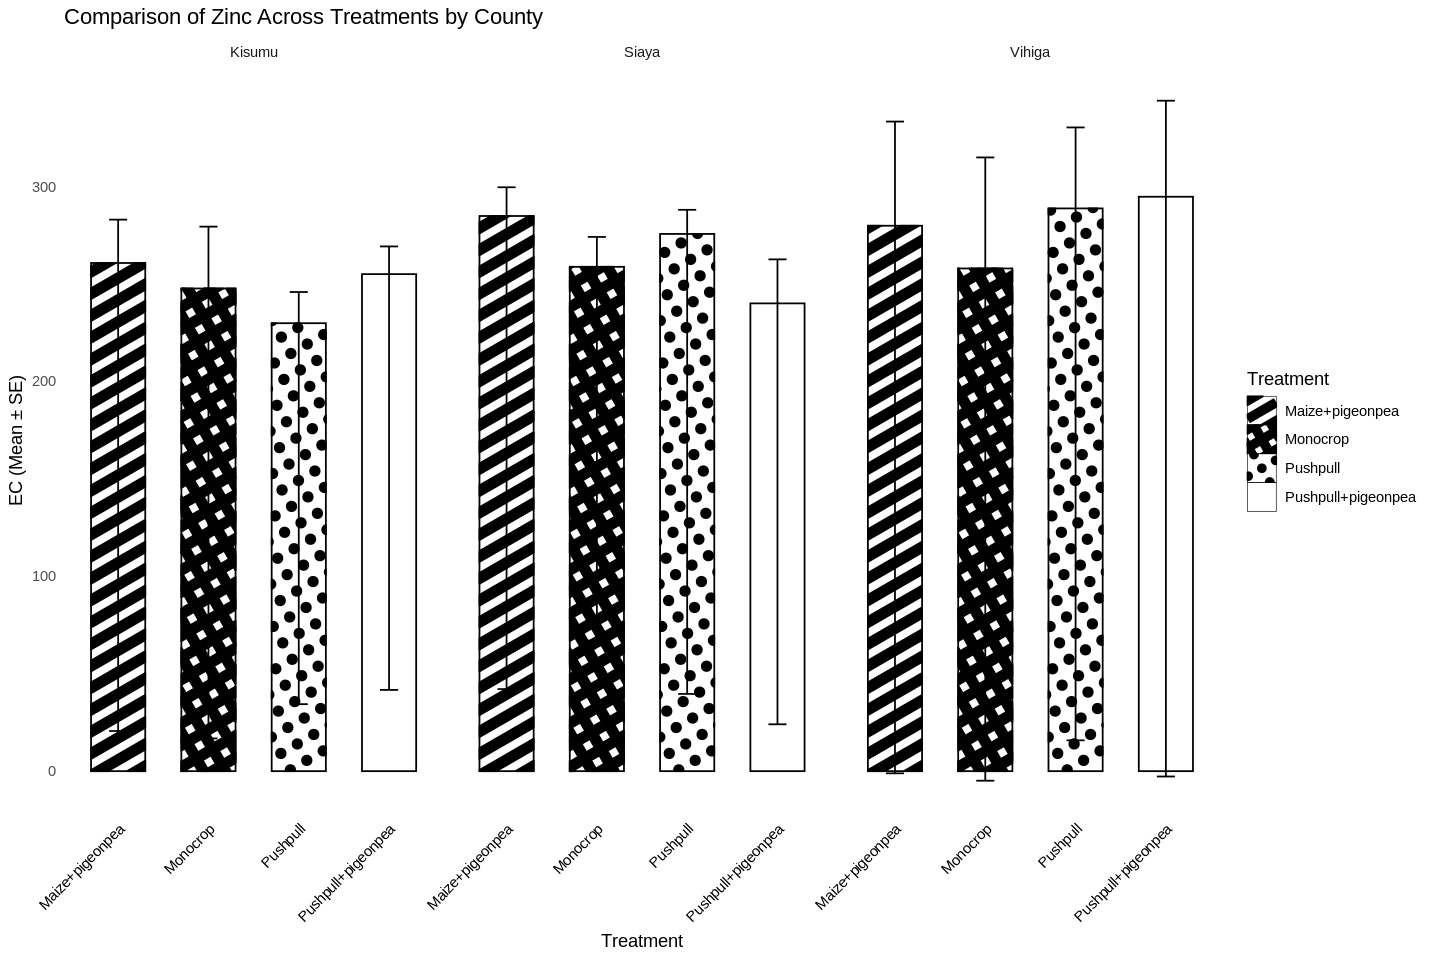

In [81]:
ggplot(combined_summary, aes(x = Treatment, y = mean_Zn, pattern = Treatment)) +
  geom_bar_pattern(
    stat = "identity",
    position = position_dodge(width = 0.7),
    width = 0.6,
    fill = "white",
    color = "black",
    pattern_fill = "black",
    pattern_colour = "black",
    pattern_density = 0.5,
    pattern_spacing = 0.05,
    pattern_key_scale_factor = 0.6
  ) +
  geom_errorbar(
    aes(ymin = mean_EC - se_Zn, ymax = mean_Zn + se_Zn),
    width = 0.2,
    position = position_dodge(width = 0.7)
  ) +
  facet_wrap(~ County) +
  scale_pattern_manual(values = c("stripe", "crosshatch", "circle", "none")) +
  theme_minimal() +
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, color = "black")
  ) +
  labs(
    y = "EC (Mean ± SE)",
    x = "Treatment",
    title = "Comparison of Zinc Across Treatments by County"
  )